# Sentiment Analysis of Survey Responses

## Reading Survey Responses

In [2]:
import pandas as pd

# Path to the CSV file
file_path = 'Singapore Mathematics Education Survey.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Print the first 10 rows of the CSV file
data.head(10)

,What are the main challenges you face in learning Mathematics?,How often do you use online resources for Mathematics learning?,Give some examples of online resources you use for Mathematics learning.,What features do you find most useful in an online learning platform?,How would you rate your satisfaction with current Mathematics learning tools that are available online?,What specific improvements would you suggest for online Mathematics platforms?
0,"Understanding complex concepts, keeping up wit...",Daily,"Khan academy, udemy","Interactive lessons, video tutorials",Satisfied,"More personalized feedback, adaptive learning ..."
1,"Applying formulas to problems, lack of practice.",Weekly,youtube,"Practice problems, step-by-step solutions",Neutral,"Better integration with school curriculum, mor..."
2,My child finds it hard to stay motivated and n...,Occasionally,Photo math,"Gamified lessons, progress tracking",Dissatisfied,"More engaging content, progress reports for pa..."
3,Students struggle with different parts of the ...,Several times a week,ChatGPT - for generating more math questions.\...,"Customizable assignments, analytics on student...",Satisfied,"More interactive elements, better tracking of ..."
4,"Lack of immediate help when stuck, difficult t...",Monthly,Chat gpt,"Live tutoring, detailed explanations",Neutral,"On-demand tutoring, more detailed lesson content"
5,"Difficulty in understanding word problems, tim...",Daily,NaN,"Interactive lessons, progress tracking",Neutral,"More engaging content, additional resources fo..."
6,"Keeping up with homework, understanding advanc...",Weekly,NaN,"Step-by-step solutions, practice problems",Satisfied,"Personalized learning paths, more real-life ap..."
7,My child finds it hard to stay focused during ...,Occasionally,NaN,"Gamified content, interactive quizzes",Neutral,"More frequent progress updates, engaging video..."
8,"Ensuring all students are engaged, differentia...",Several times a week,NaN,"Analytics on student performance, customizable...",Satisfied,"More diverse question types, better integratio..."
9,"Remembering formulas, applying concepts to dif...",Daily,NaN,"Interactive lessons, video tutorials",Neutral,"Detailed explanations, more practice quizzes"


## Word Cloud and Sentiment Bar Charts

In [8]:
import os
os.system('pip install wordcloud')

0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\redoc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


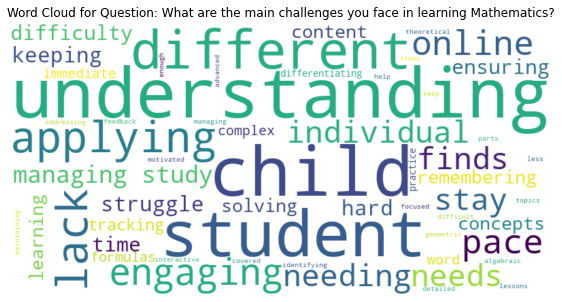

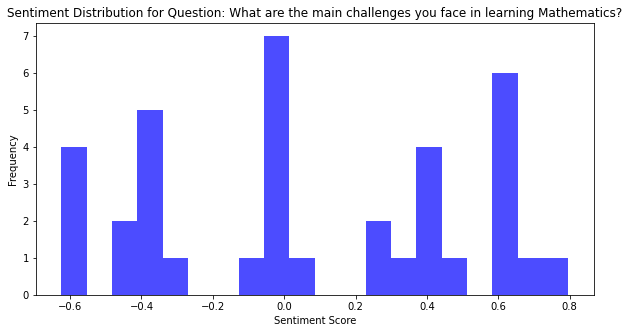

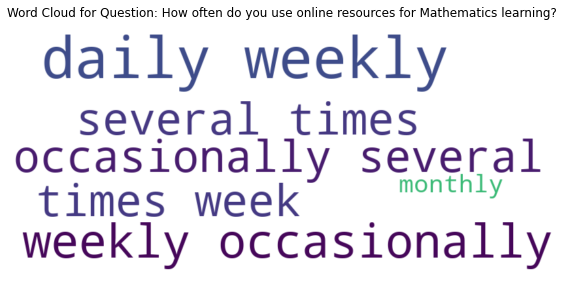

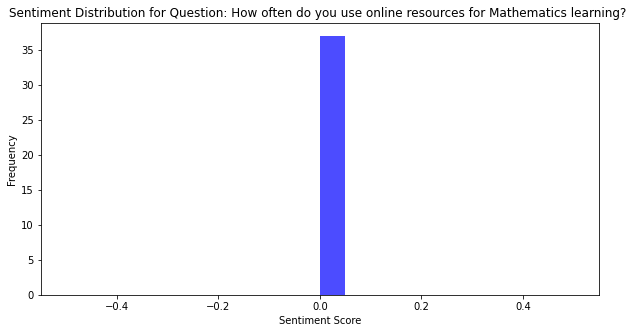

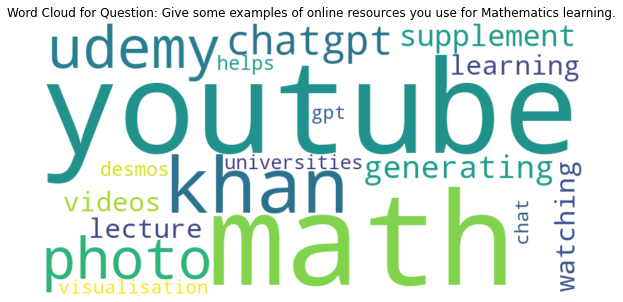

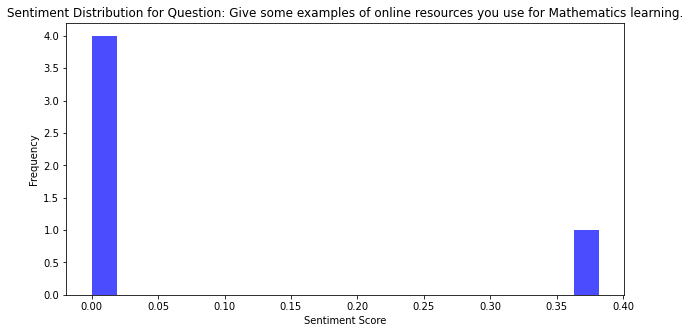

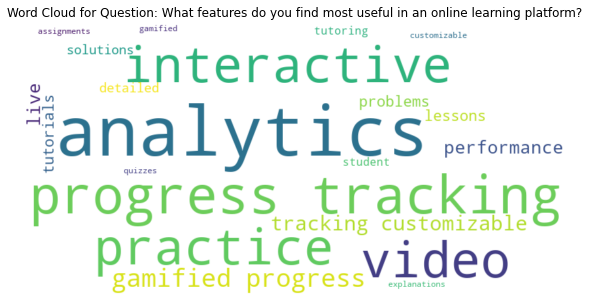

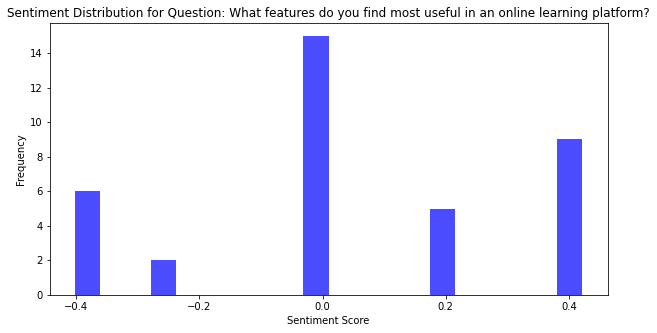

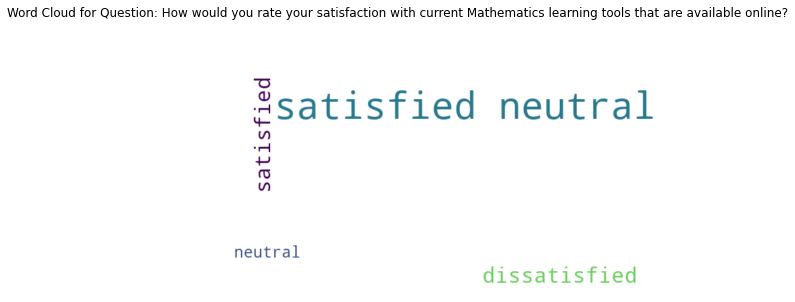

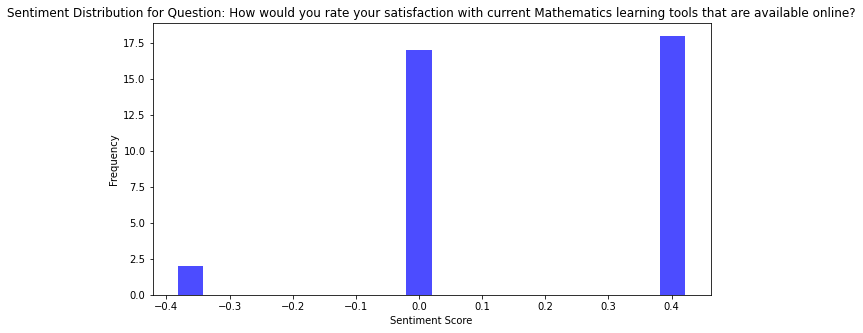

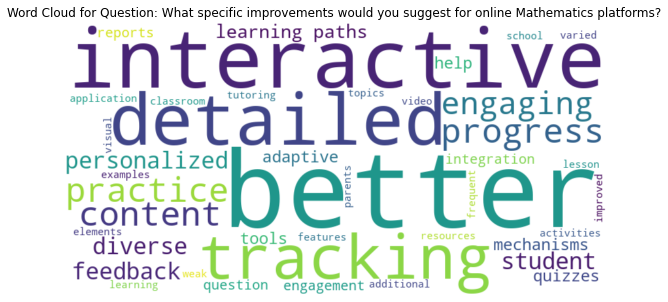

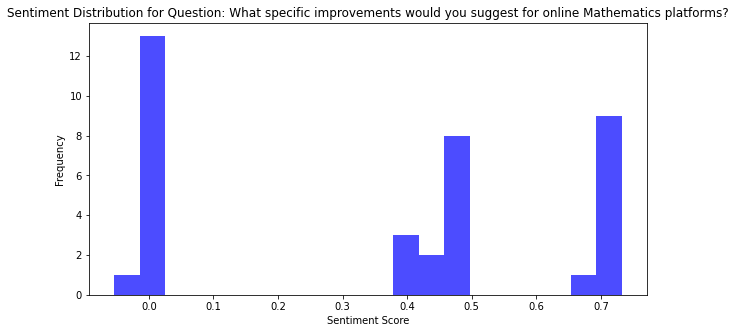

Question: What are the main challenges you face in learning Mathematics?
Average Sentiment: 0.0716162162162162
Common Words: [('understanding', 9), ('child', 9), ('different', 7), ('applying', 6), ('lack', 6), ('engaging', 6), ('pace', 5), ('students', 5), ('online', 5), ('managing', 5)]
---------------------------------------------------
Question: How often do you use online resources for Mathematics learning? 
Average Sentiment: 0.0
Common Words: [('daily', 9), ('weekly', 9), ('occasionally', 9), ('several', 9), ('times', 9), ('week', 9), ('monthly', 1)]
---------------------------------------------------
Question: Give some examples of online resources you use for Mathematics learning.
Average Sentiment: 0.07636
Common Words: [('youtube', 2), ('math', 2), ('khan', 1), ('udemy', 1), ('photo', 1), ('chatgpt', 1), ('generating', 1), ('supplement', 1), ('learning', 1), ('watching', 1)]
---------------------------------------------------
Question: What features do you find most useful in

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the CSV file
file_path = 'Singapore Mathematics Education Survey.csv'
data = pd.read_csv(file_path)

# Define a function to clean and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = text.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Initialize an empty list to store the results
results = []

# Loop through each question (column) in the survey
for column in data.columns:
    if column == 'Role':
        continue
    responses = data[column].dropna().tolist()

    # Initialize lists to store sentiments and words
    sentiments = []
    all_words = []

    # Loop through each response
    for response in responses:
        # Sentiment analysis
        sentiment = sid.polarity_scores(response)
        sentiments.append(sentiment['compound'])

        # Word frequency analysis
        words = preprocess_text(response)
        all_words.extend(words)

    # Calculate average sentiment
    avg_sentiment = sum(sentiments) / len(sentiments)

    # Get common words
    common_words = Counter(all_words).most_common(10)

    # Store the results
    results.append({
        'question': column,
        'avg_sentiment': avg_sentiment,
        'common_words': common_words
    })

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Question: {column}')
    plt.show()

    # Plot sentiment distribution
    plt.figure(figsize=(10, 5))
    plt.hist(sentiments, bins=20, color='blue', alpha=0.7)
    plt.title(f'Sentiment Distribution for Question: {column}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# Print the results
for result in results:
    print(f"Question: {result['question']}")
    print(f"Average Sentiment: {result['avg_sentiment']}")
    print("Common Words:", result['common_words'])
    print("-" + "-"*50)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\redoc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redoc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


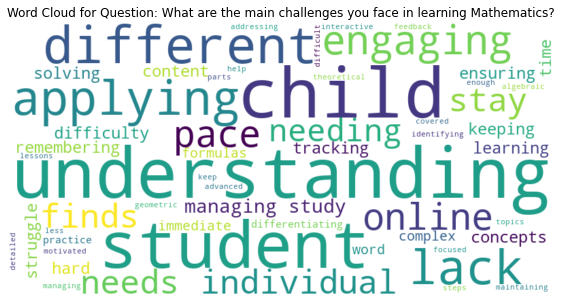

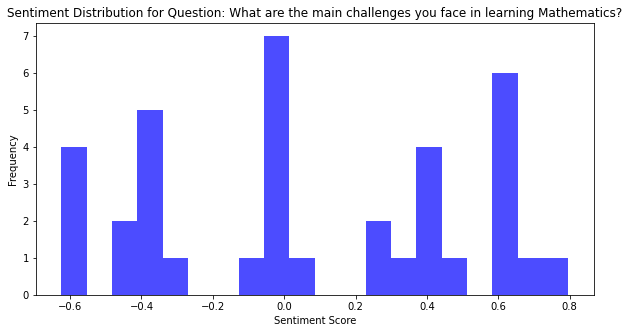

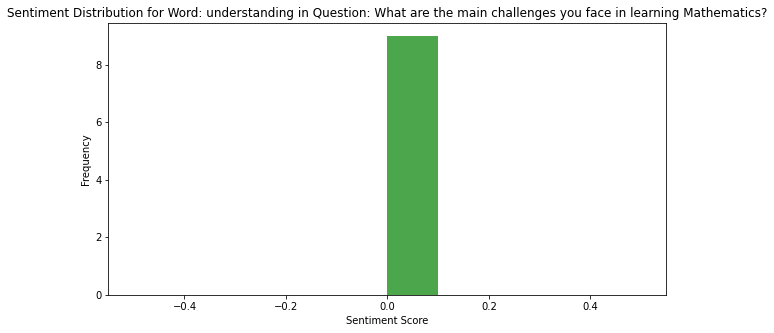

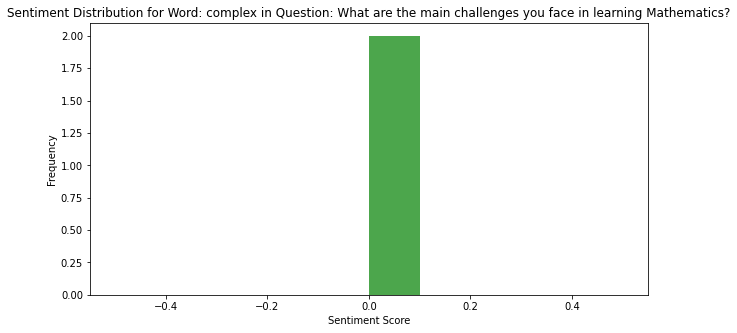

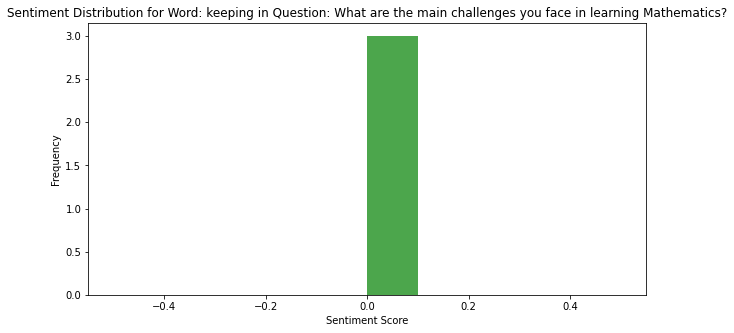

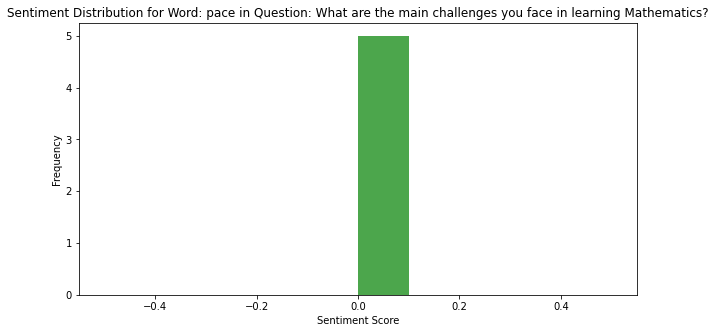

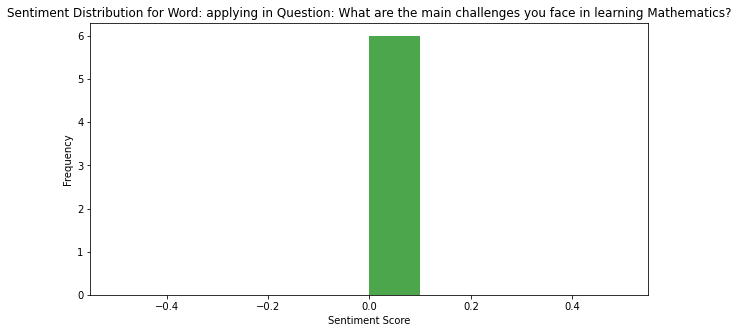

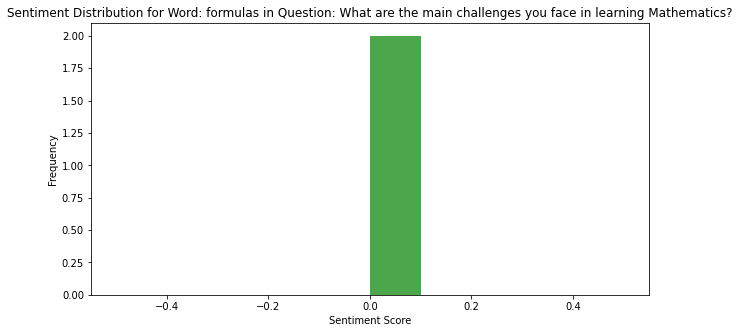

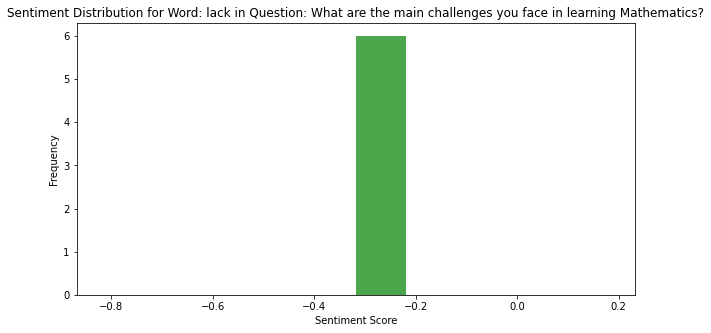

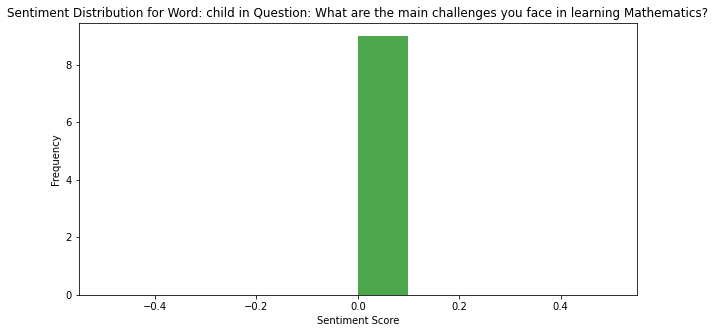

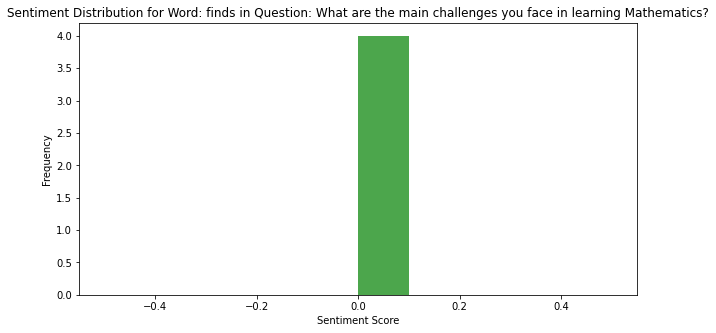

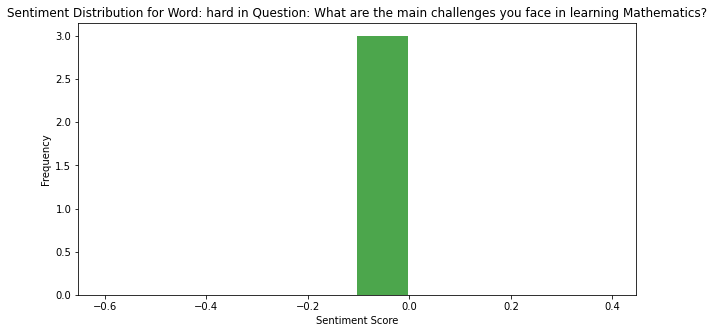

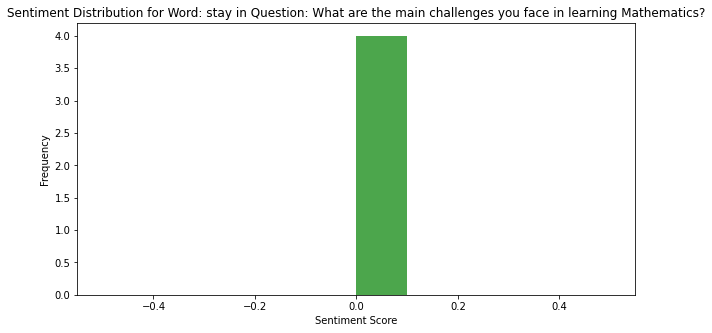

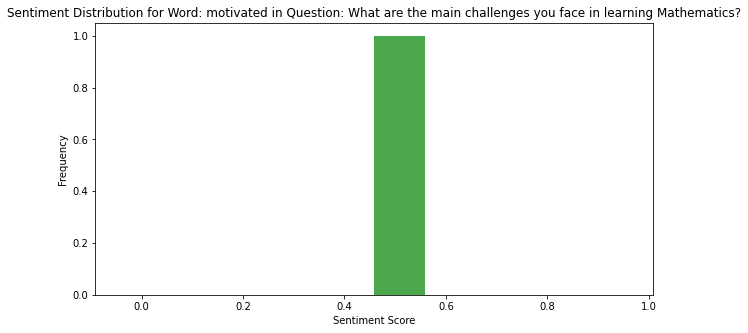

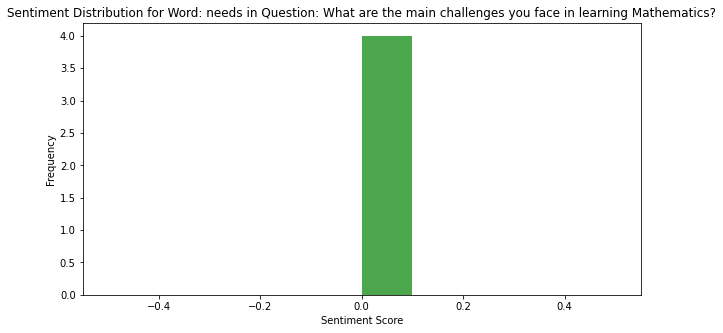

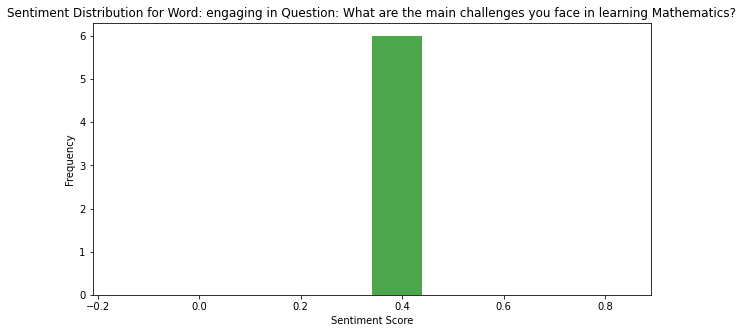

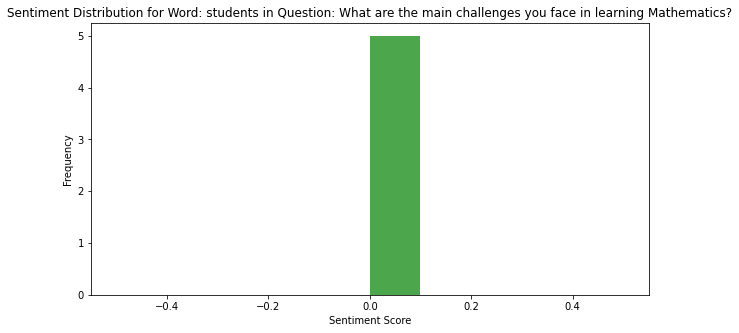

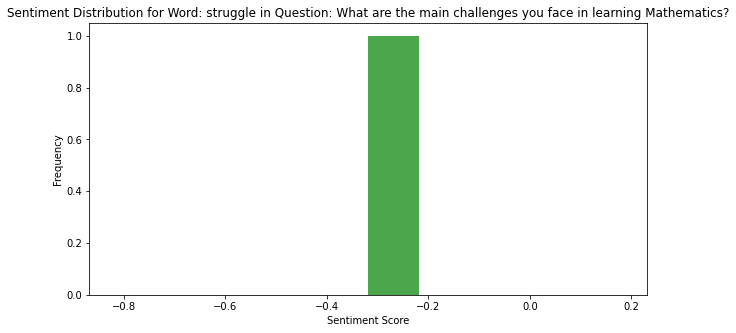

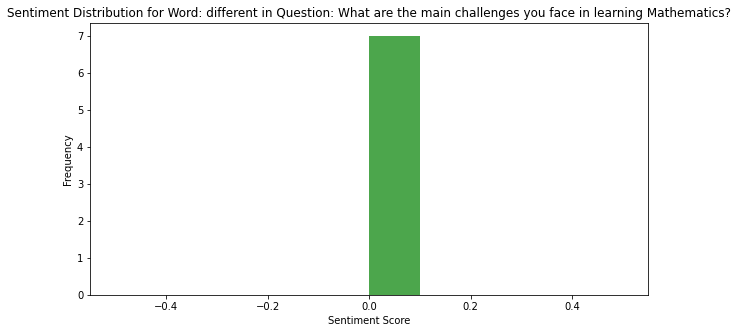

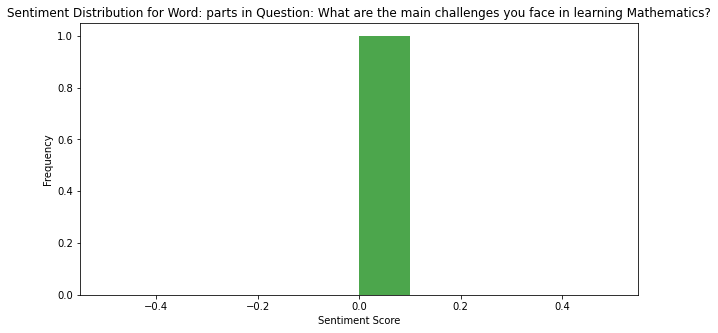

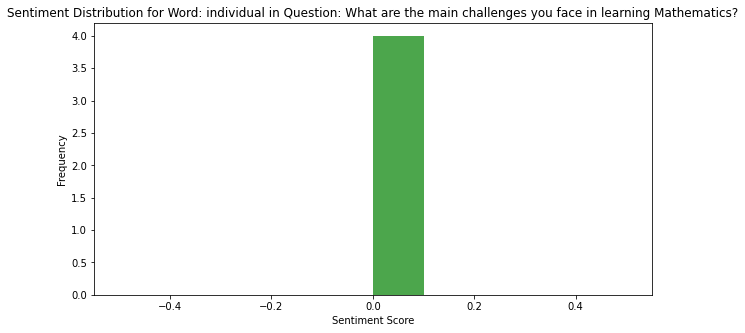

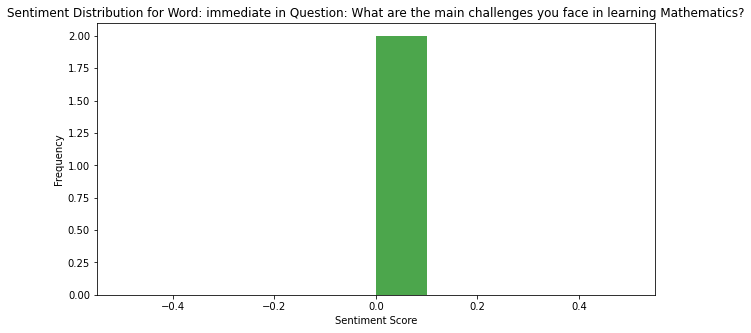

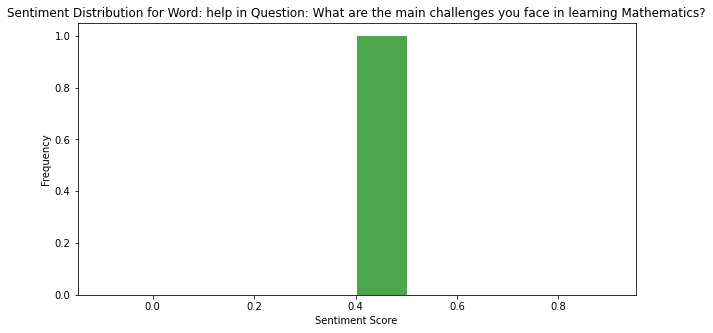

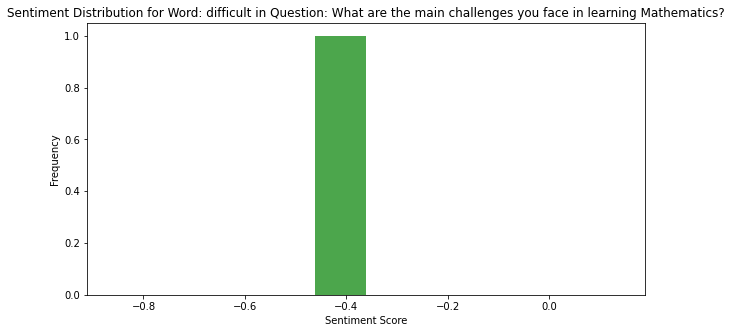

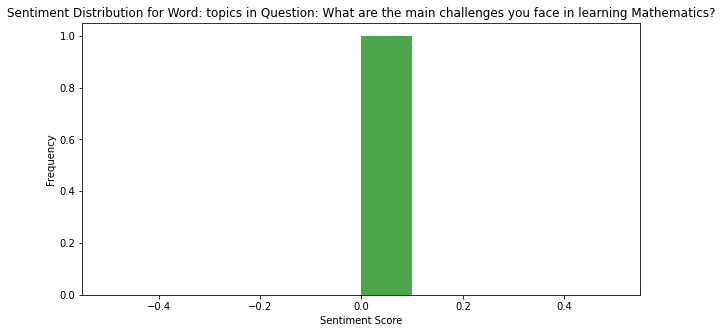

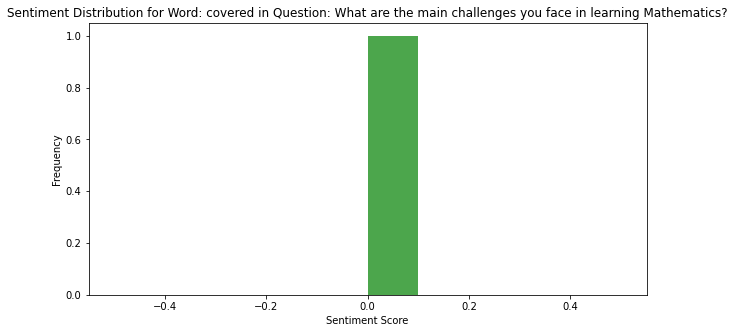

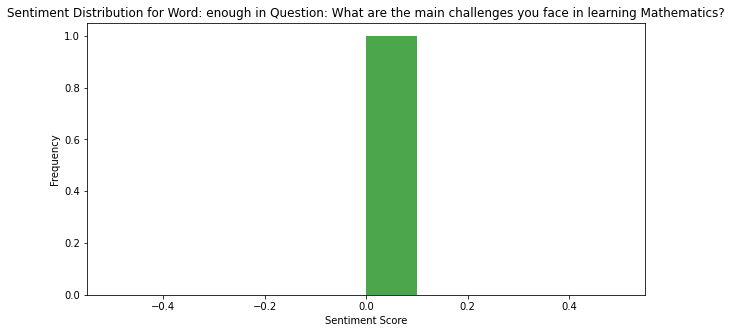

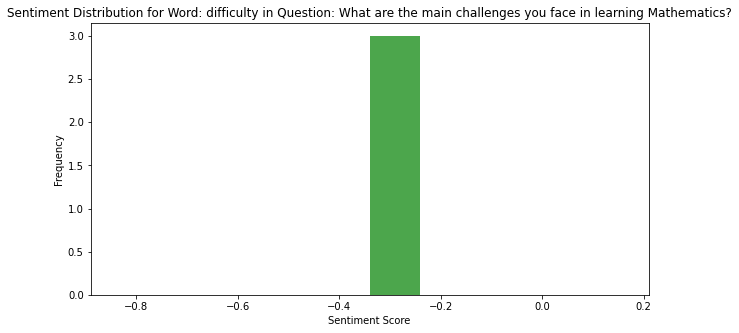

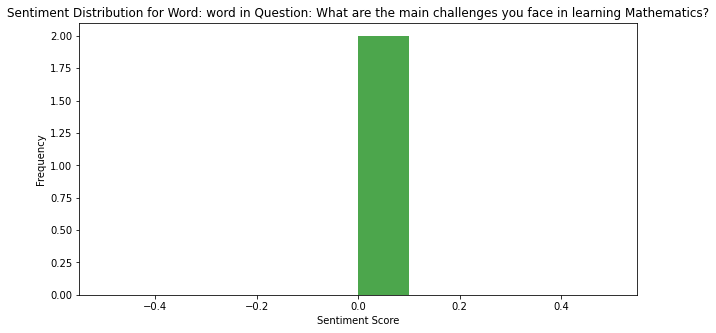

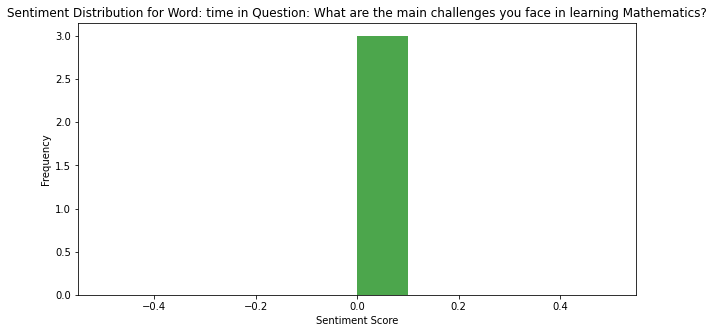

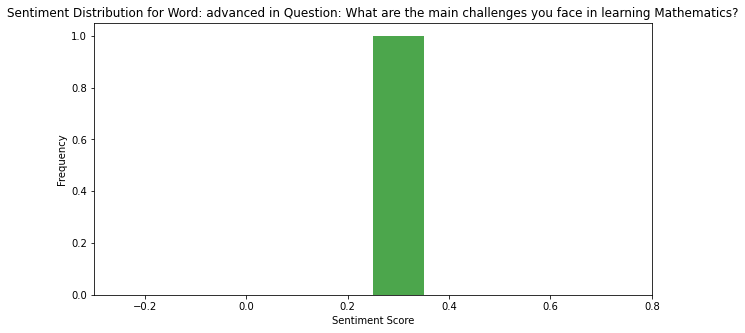

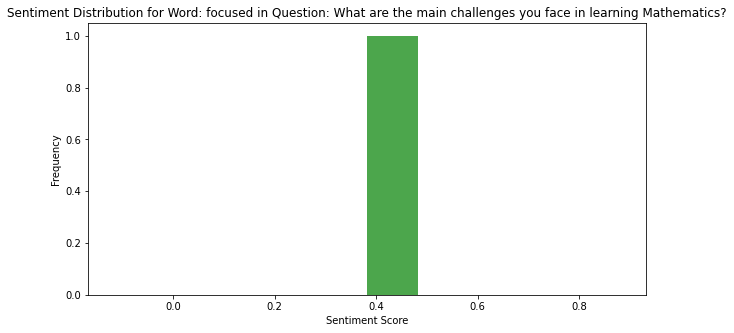

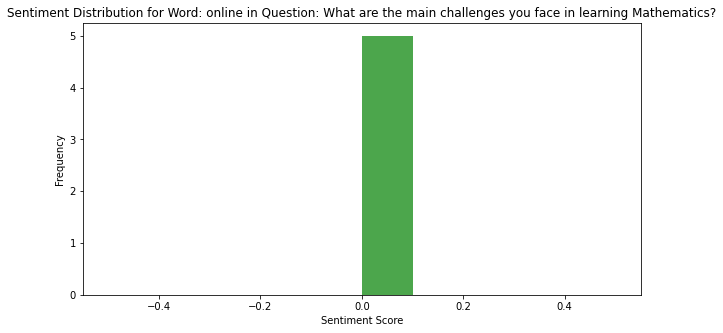

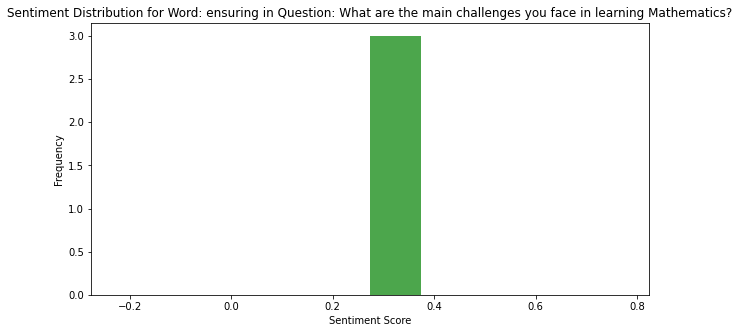

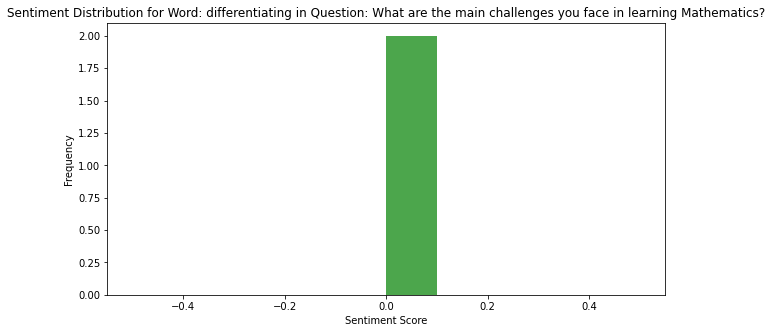

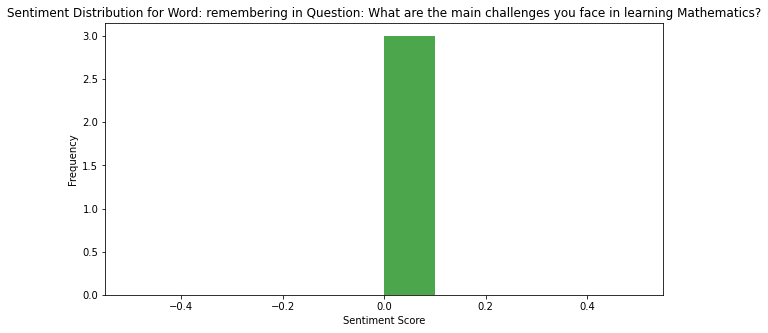

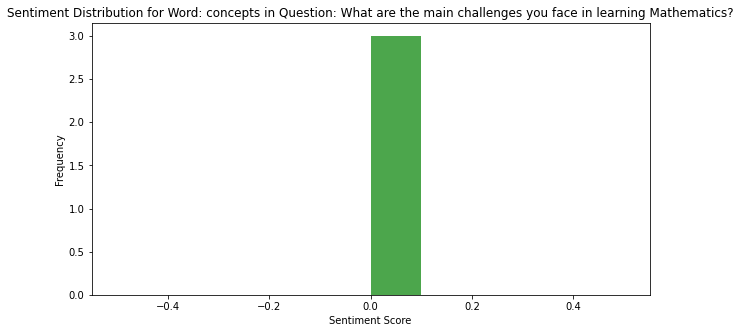

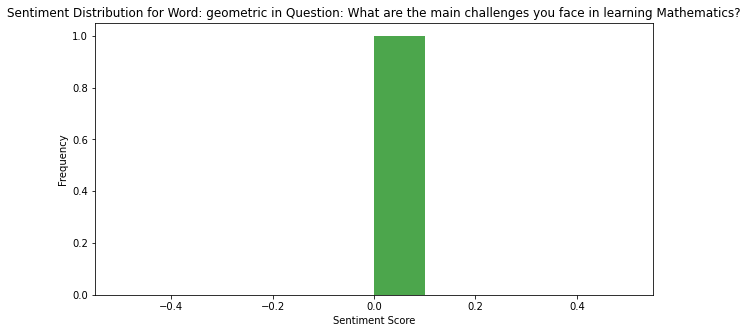

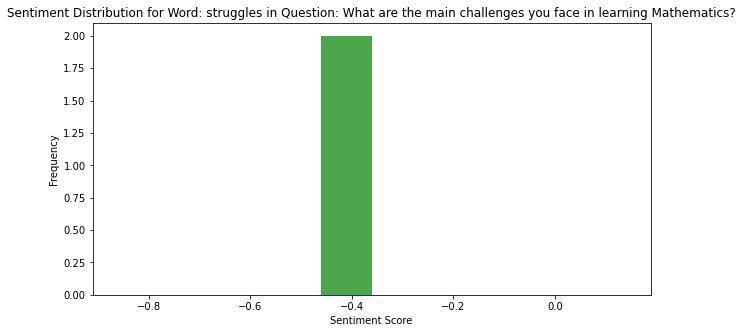

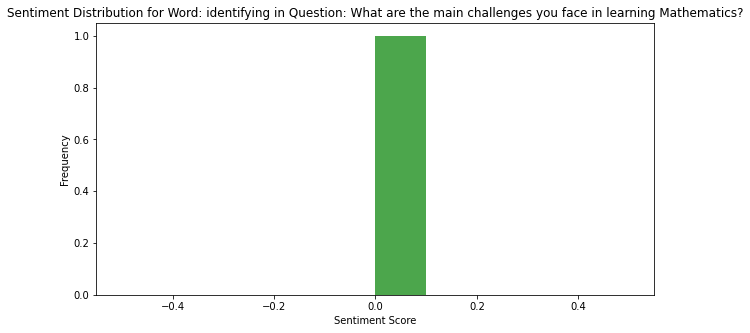

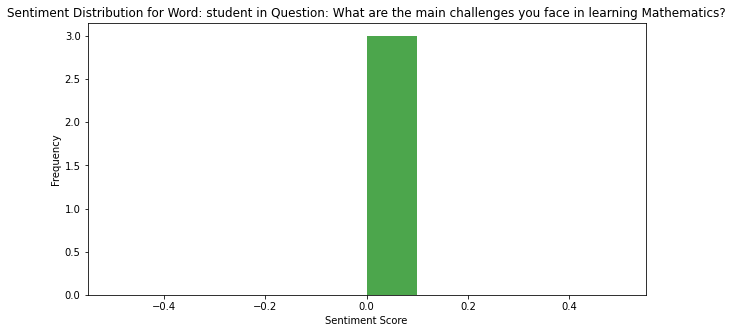

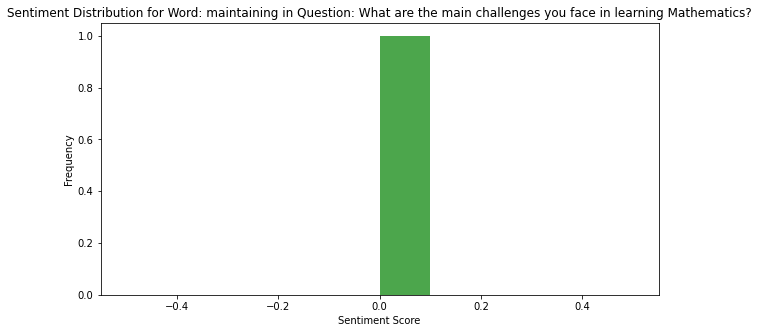

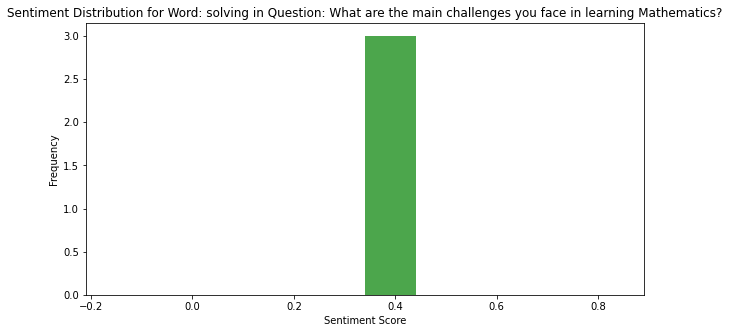

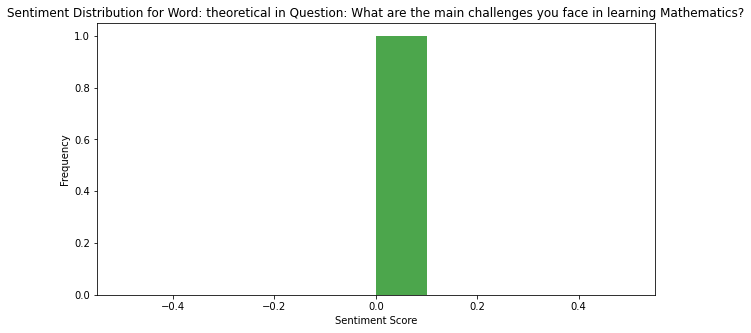

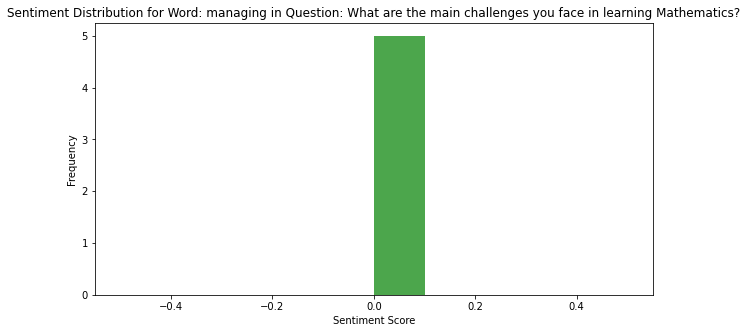

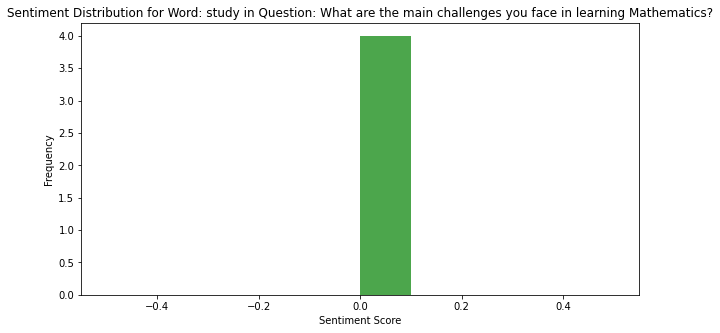

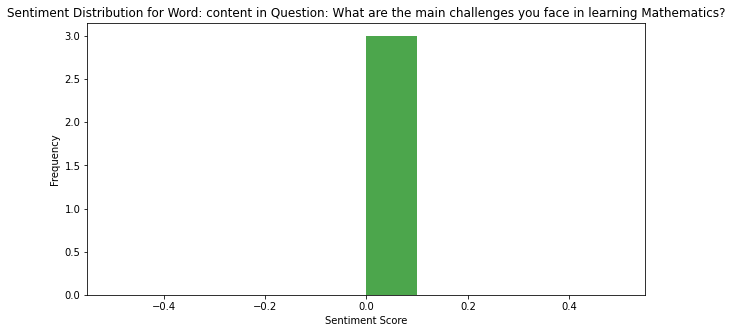

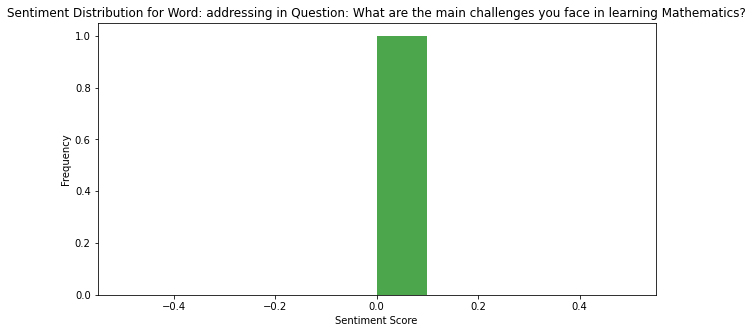

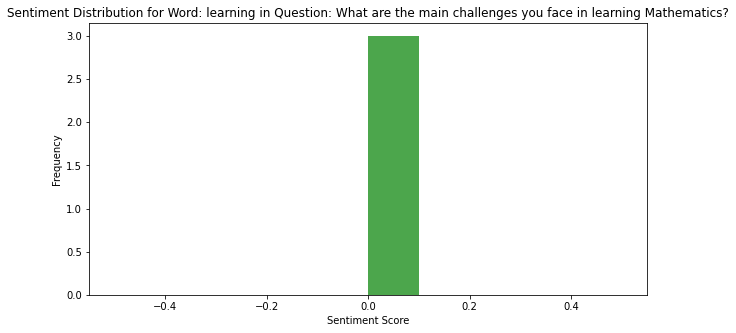

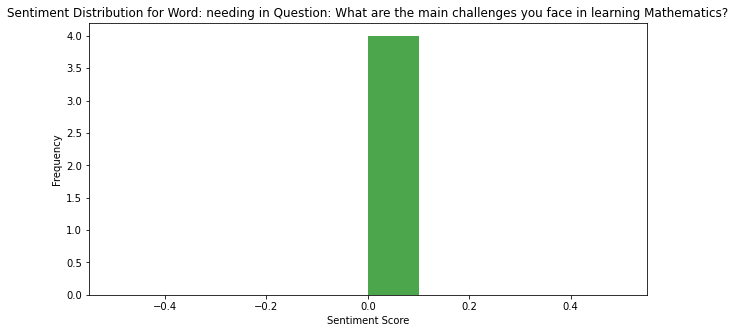

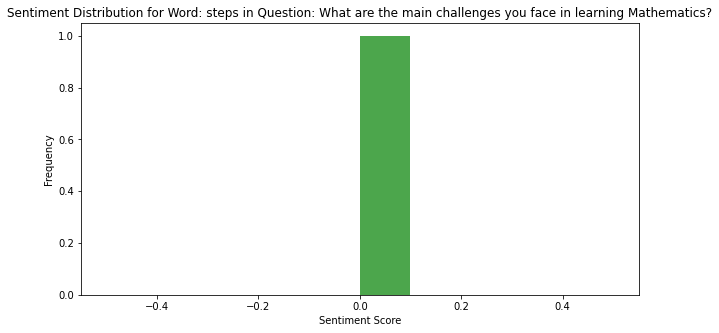

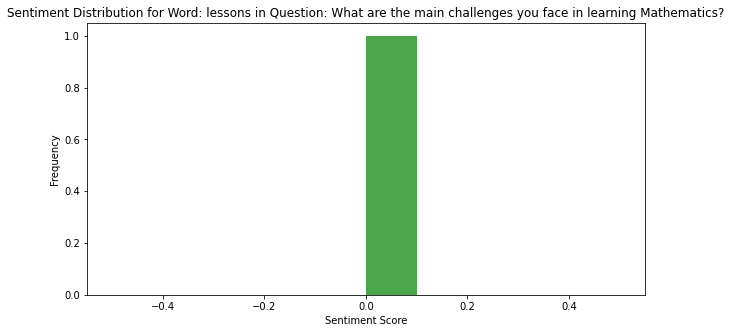

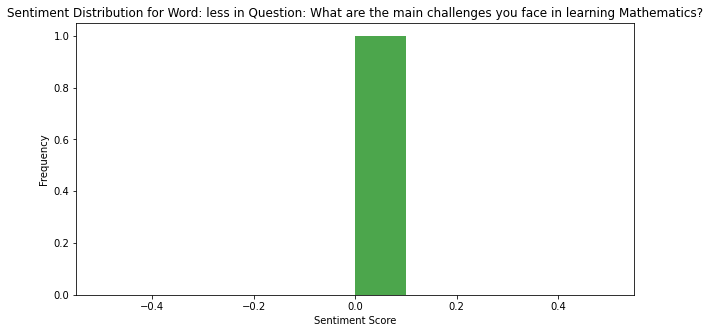

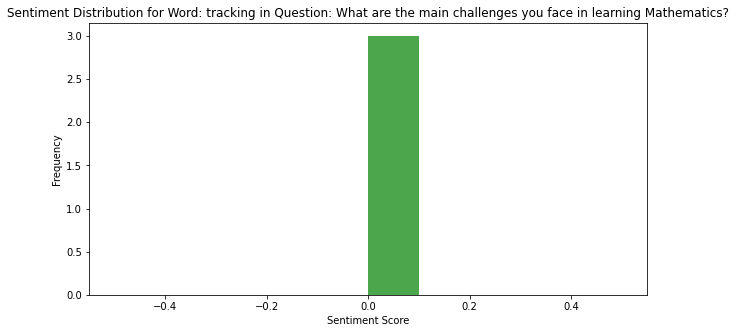

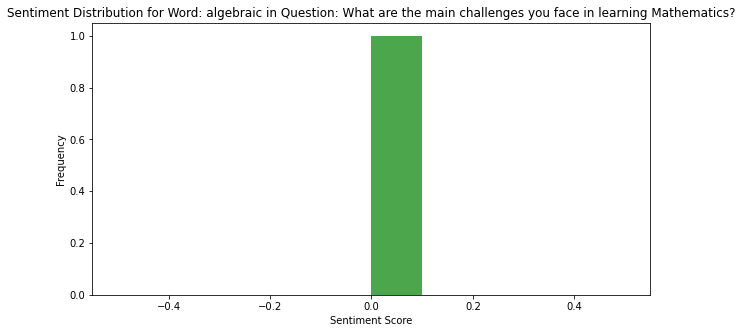

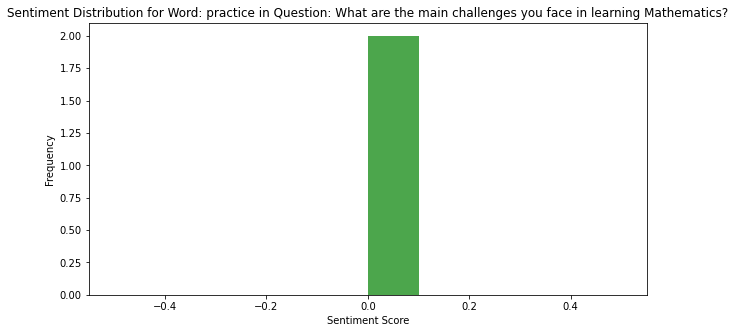

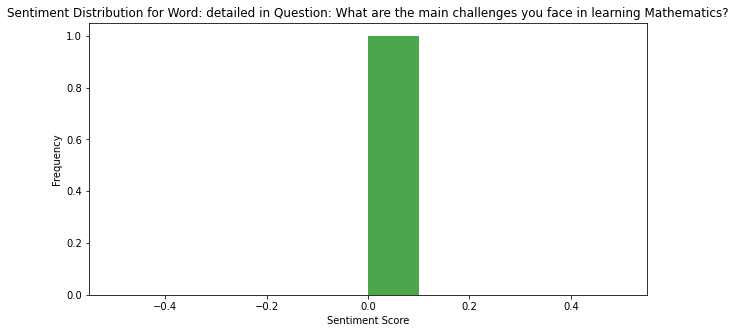

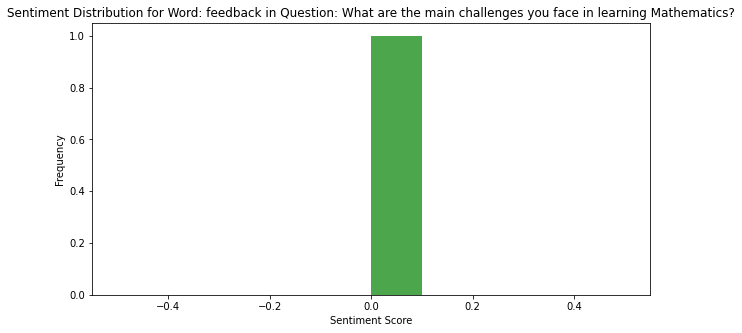

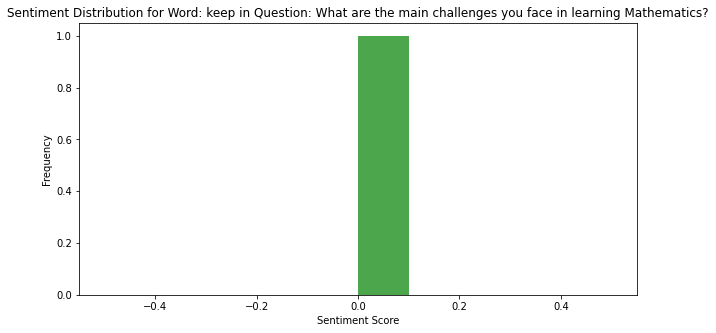

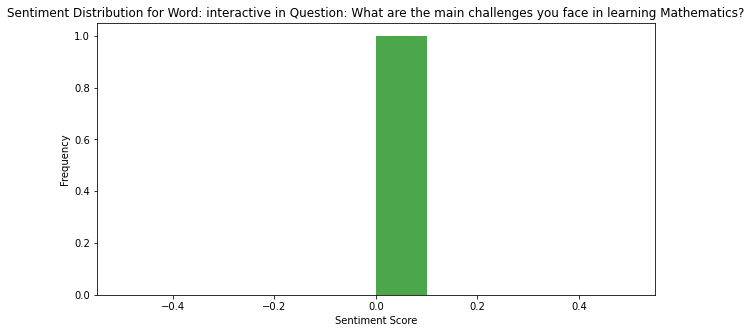

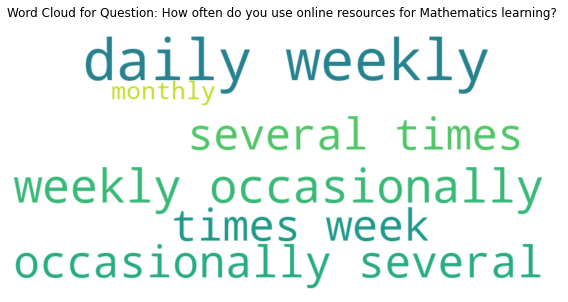

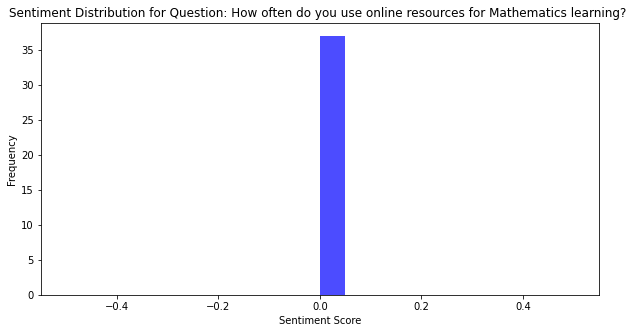

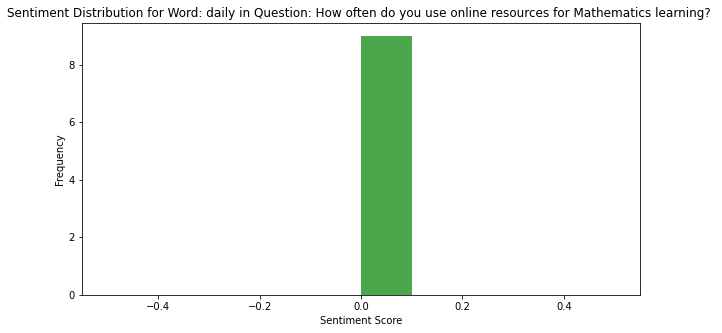

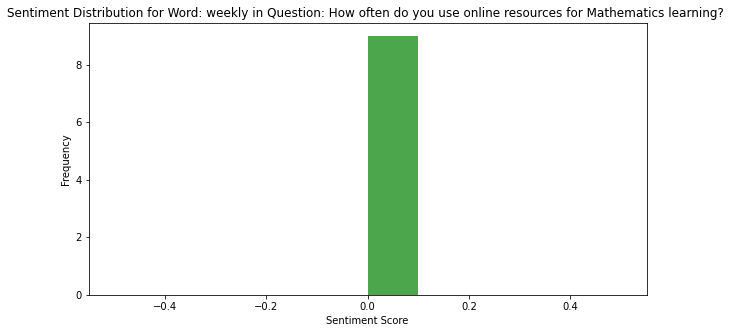

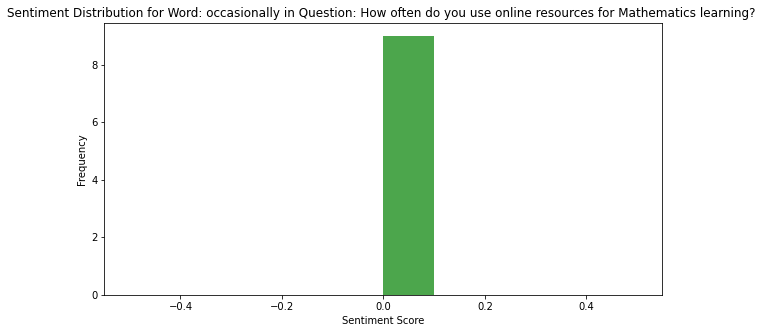

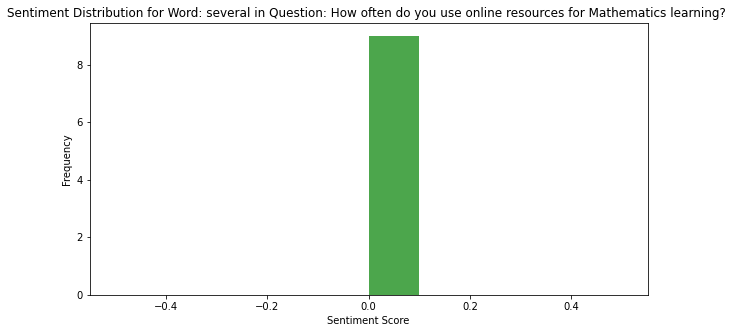

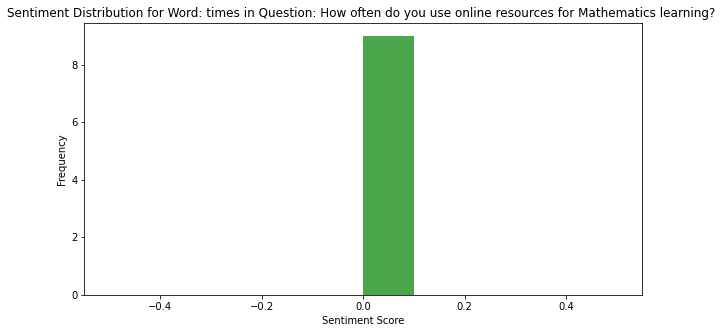

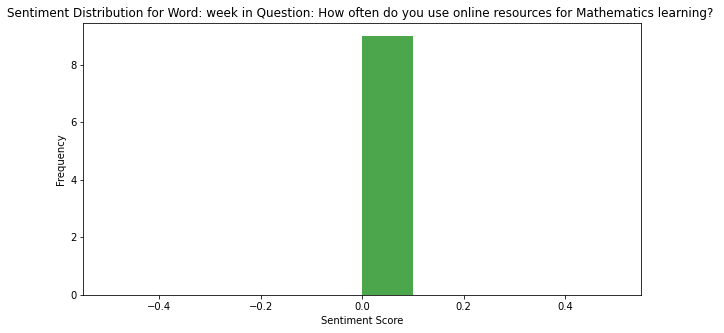

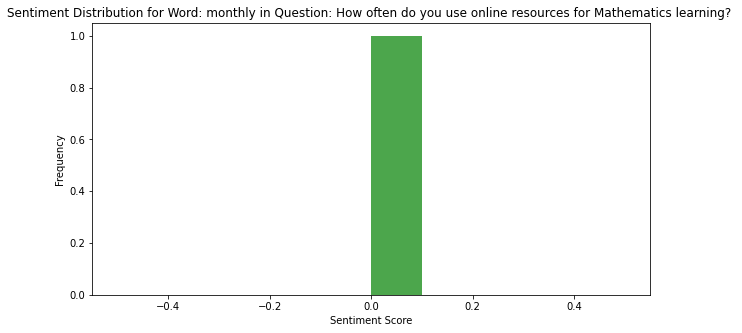

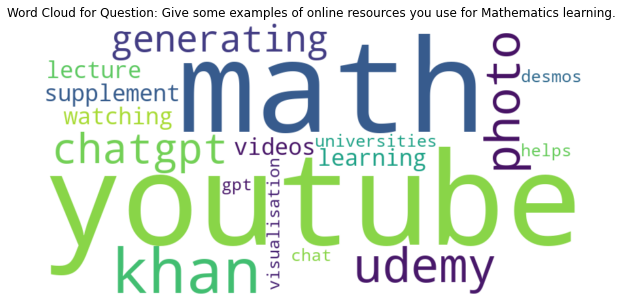

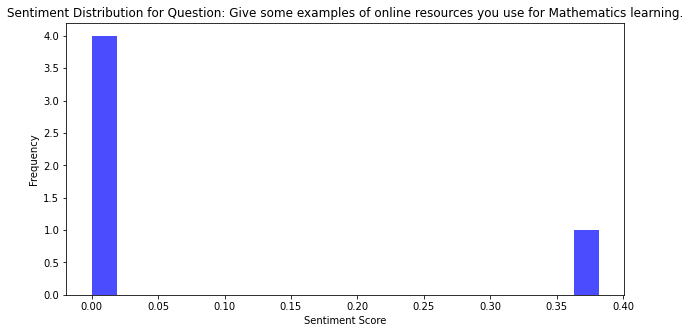

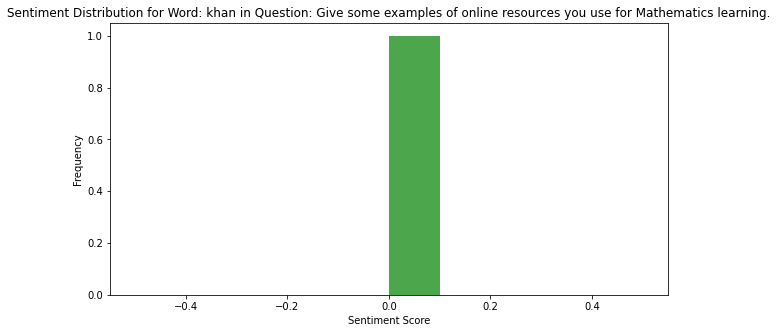

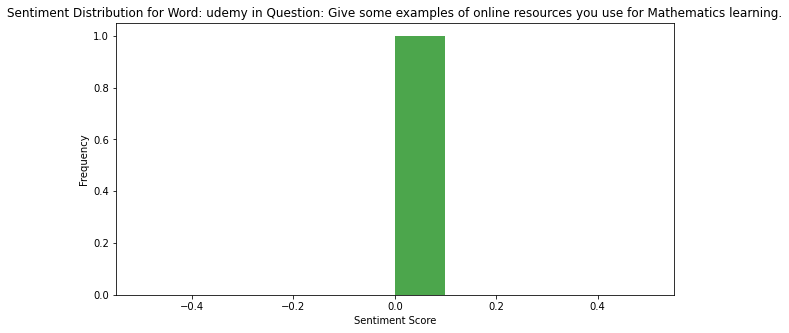

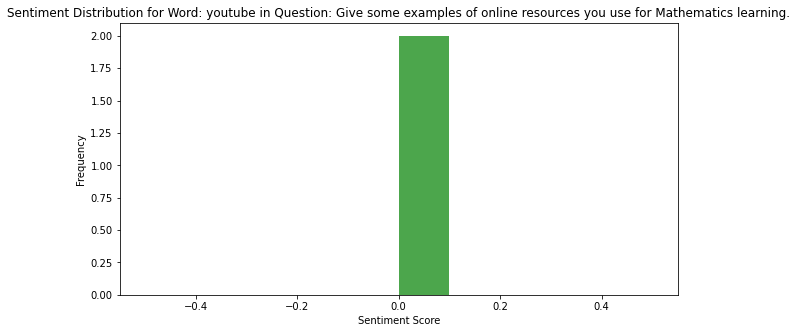

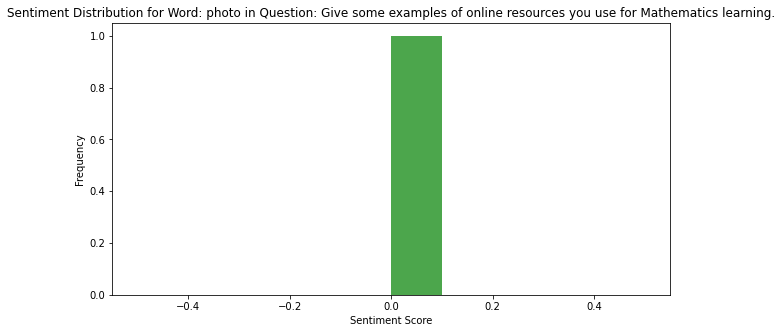

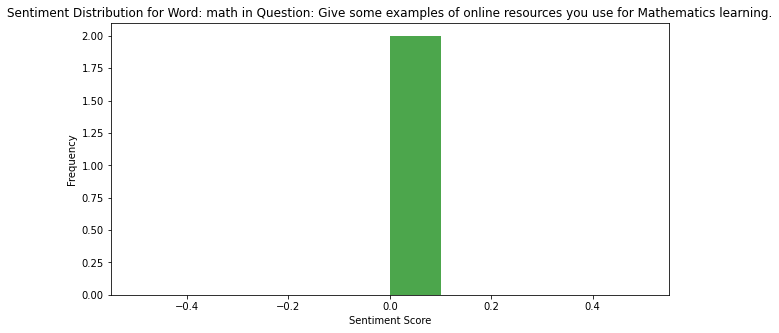

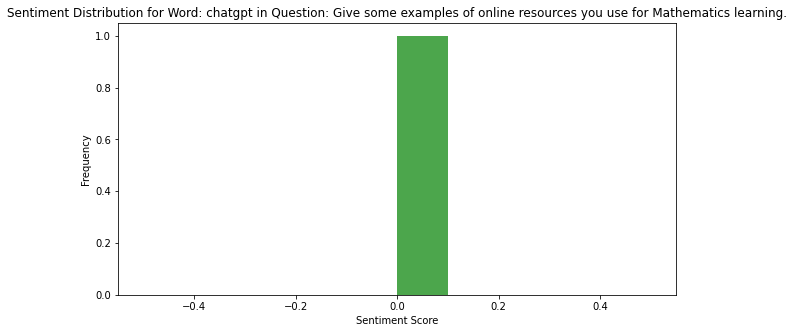

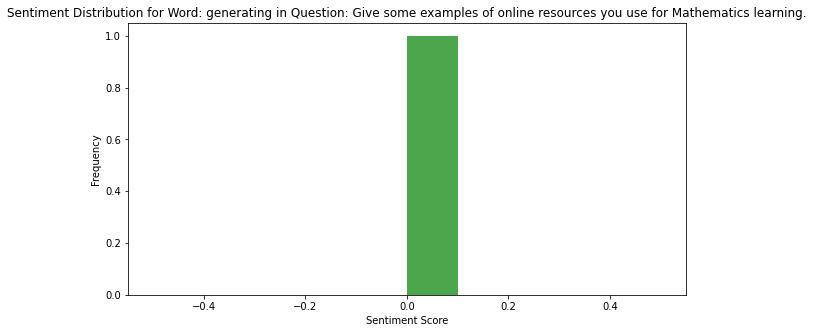

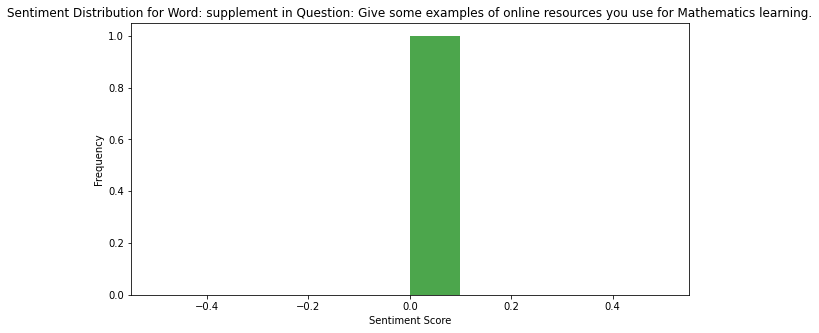

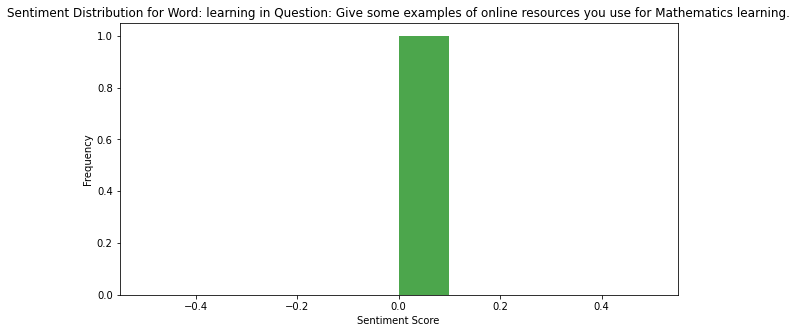

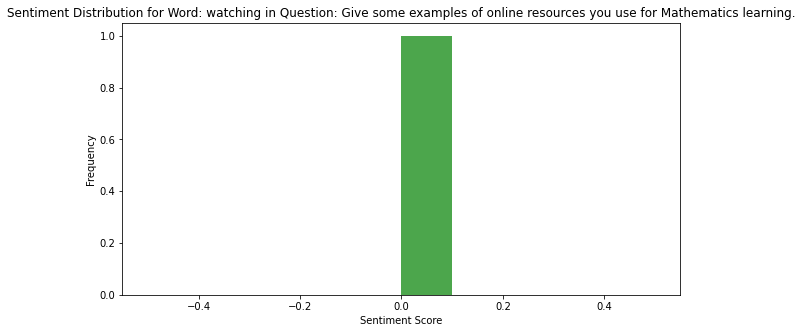

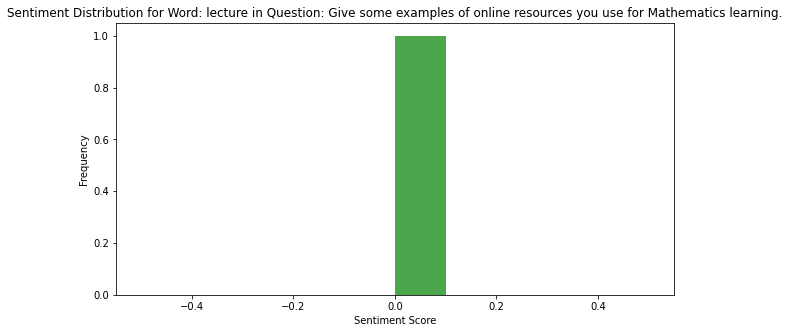

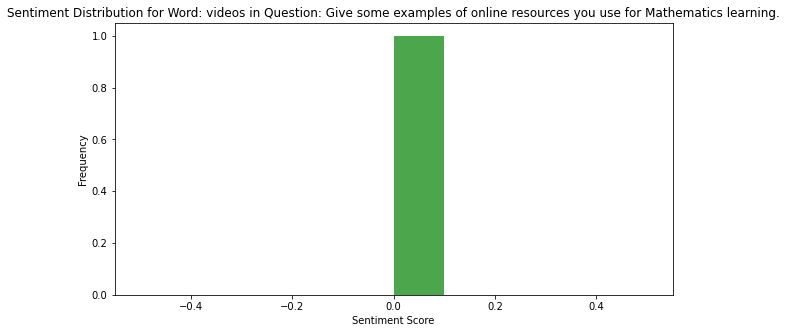

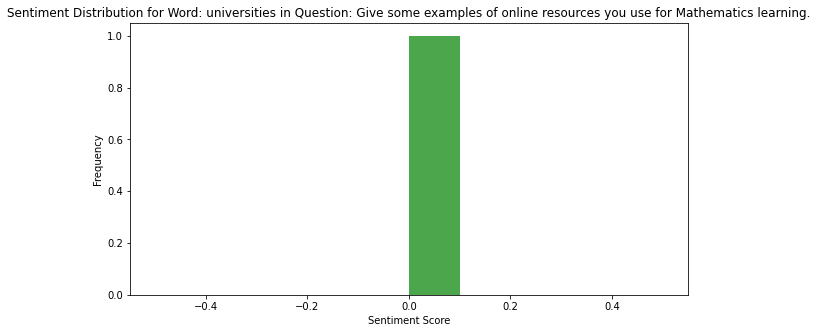

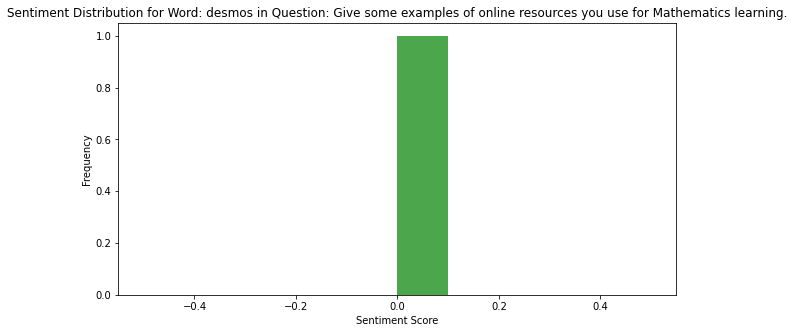

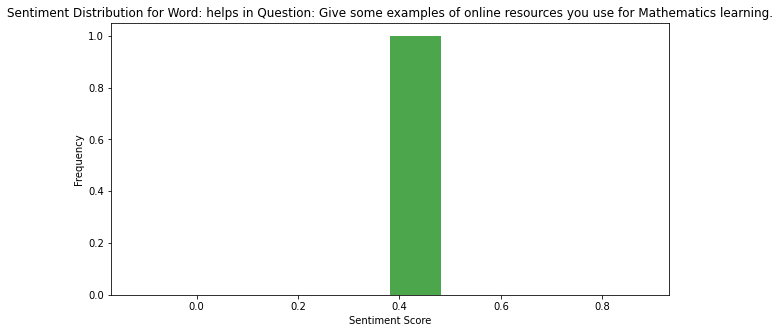

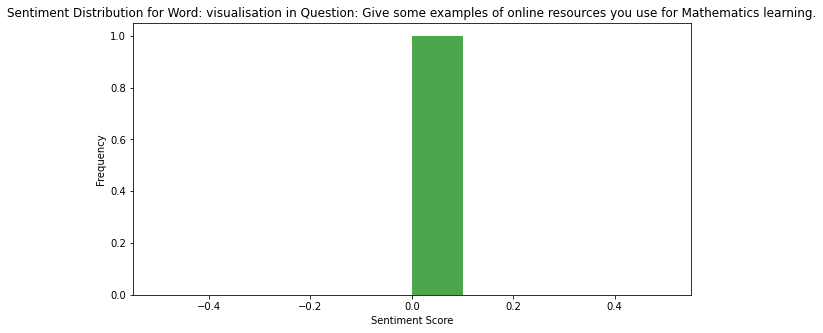

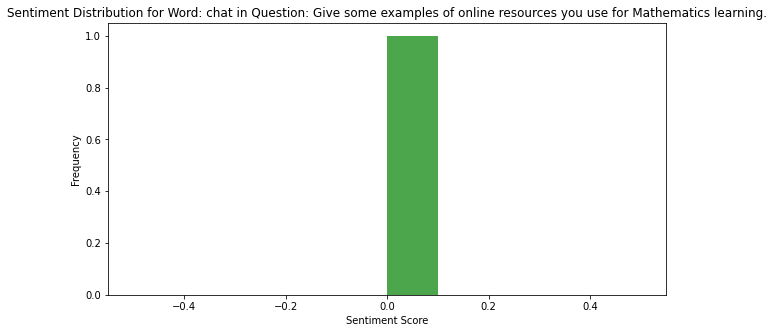

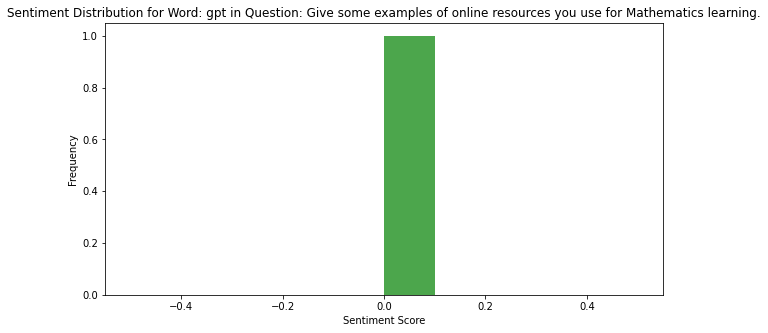

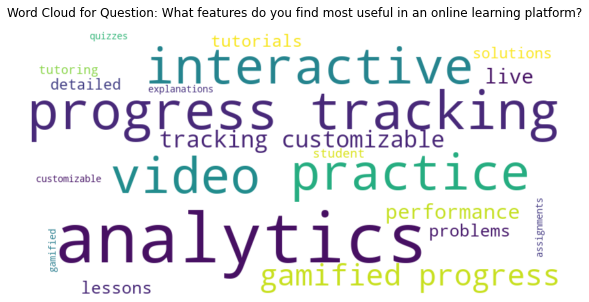

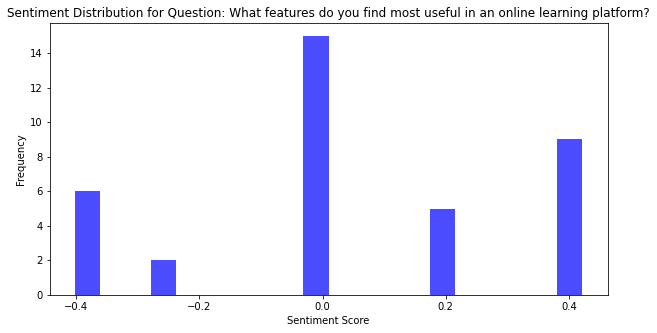

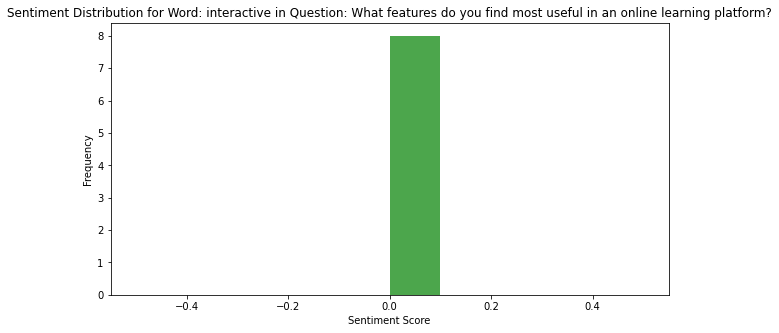

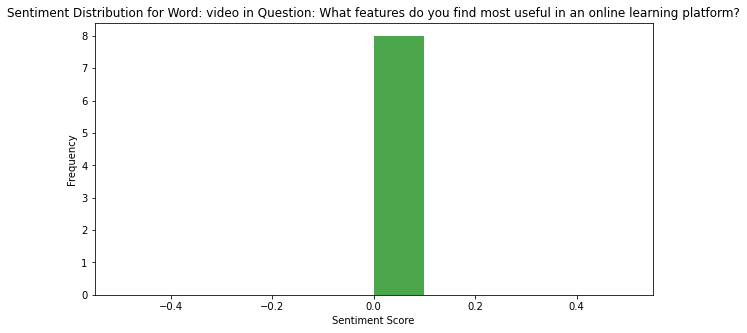

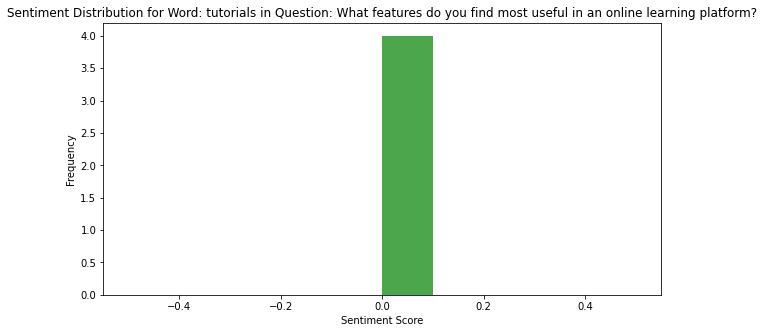

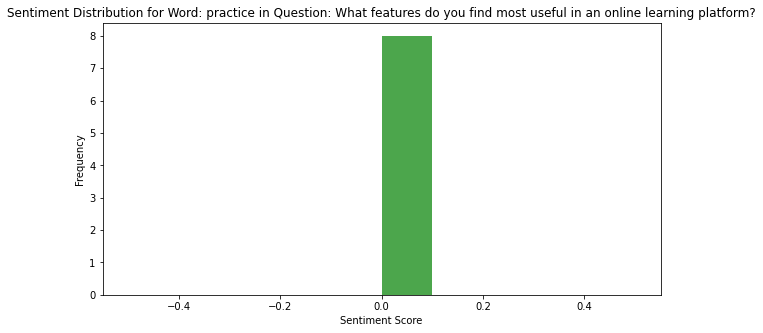

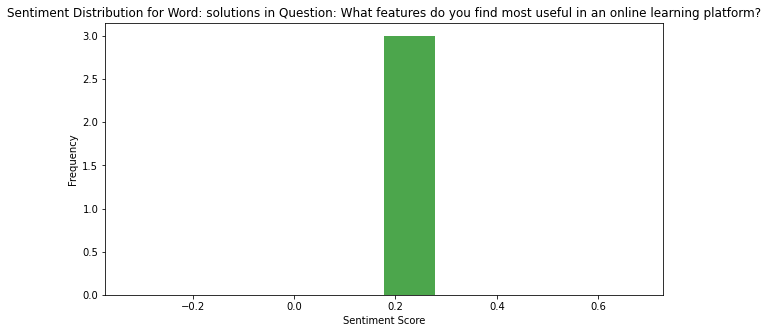

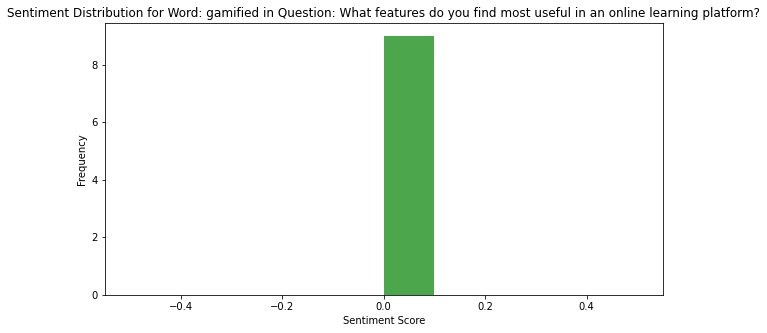

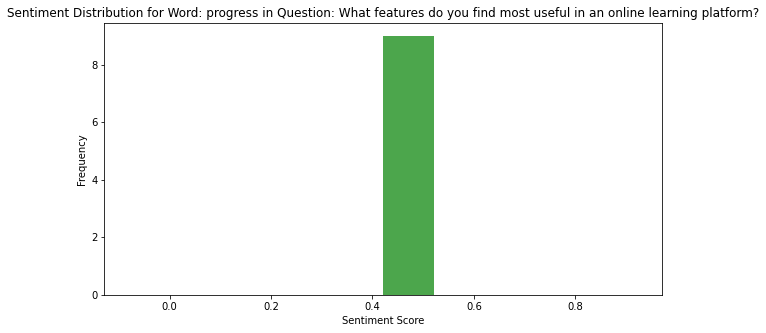

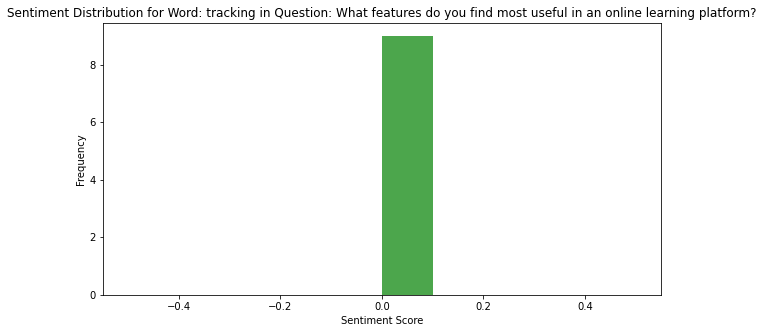

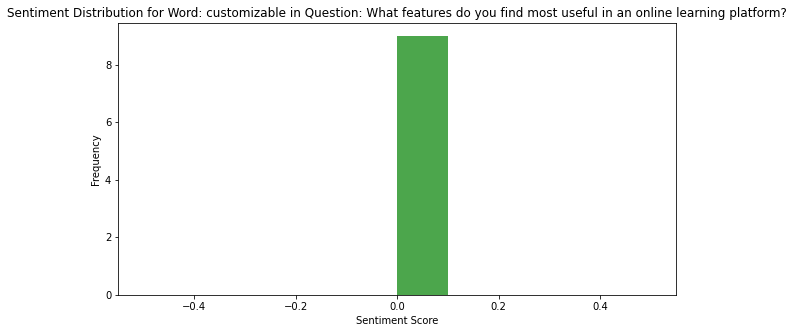

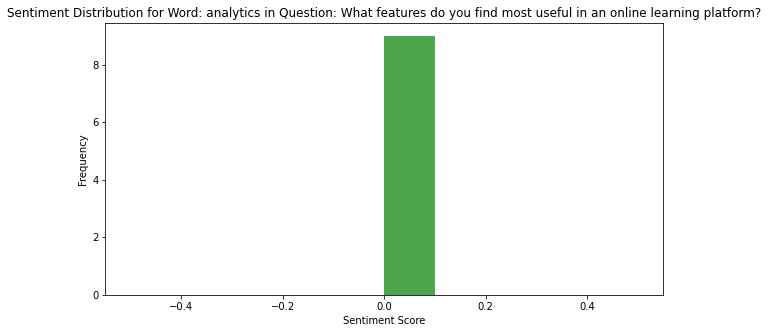

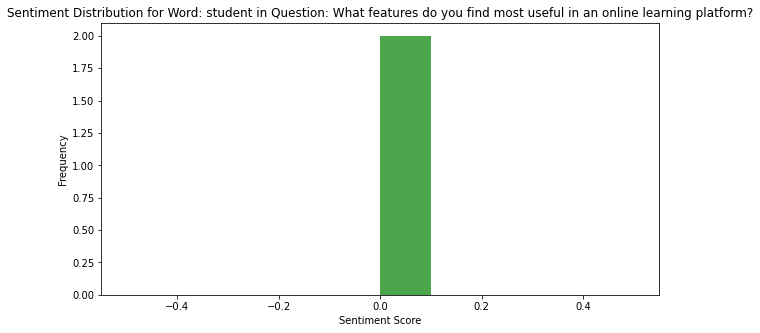

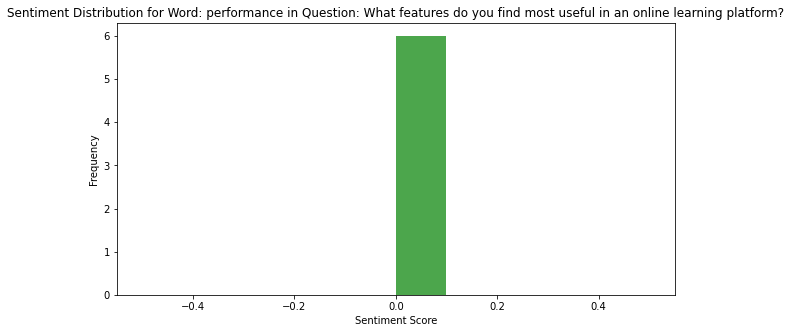

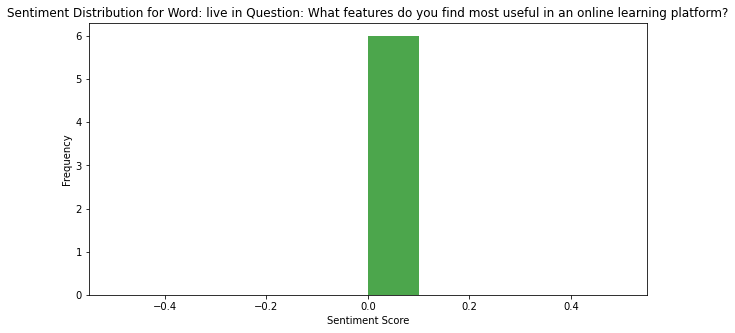

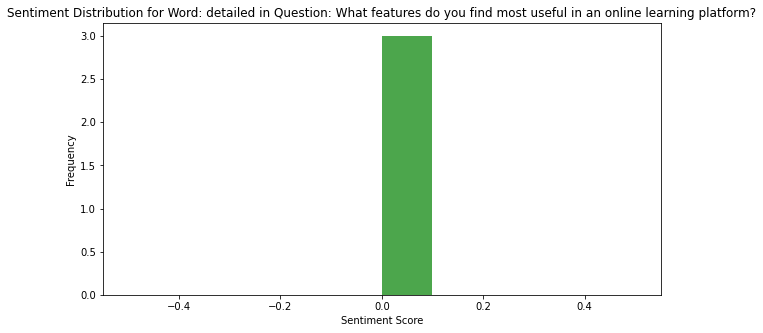

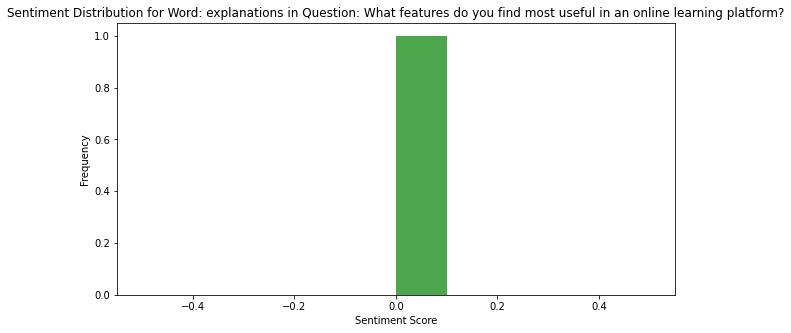

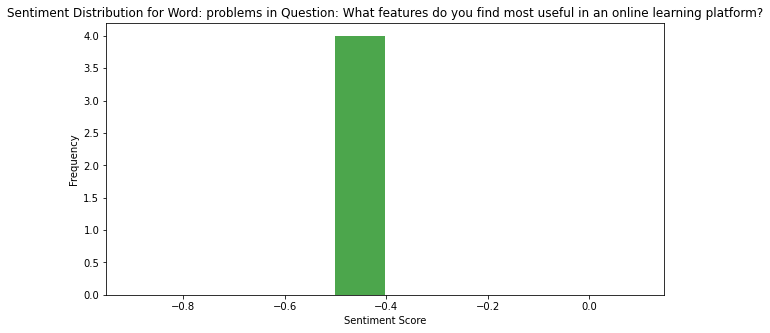

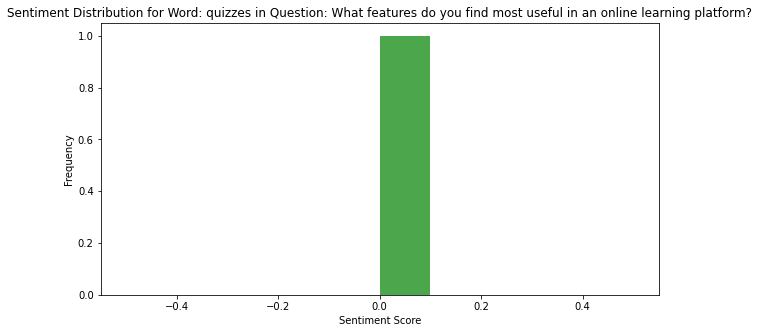

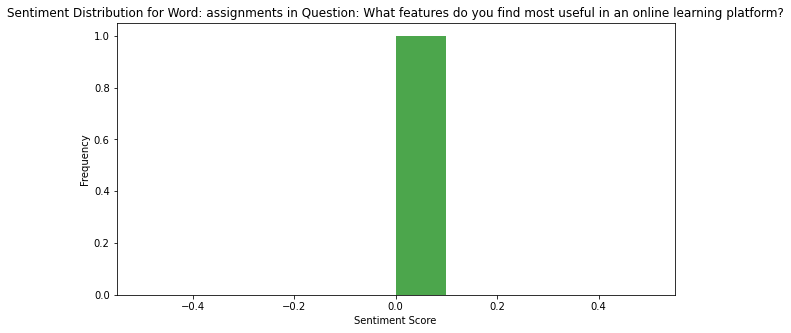

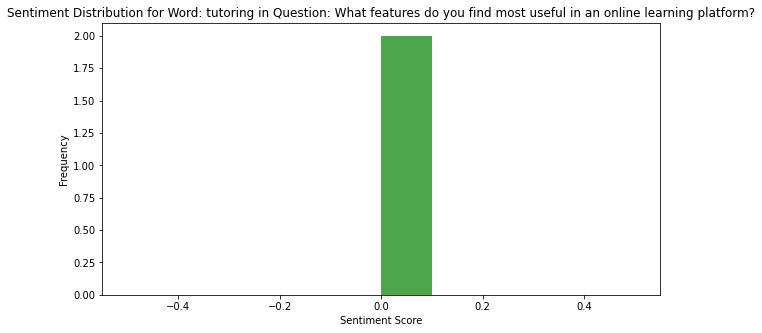

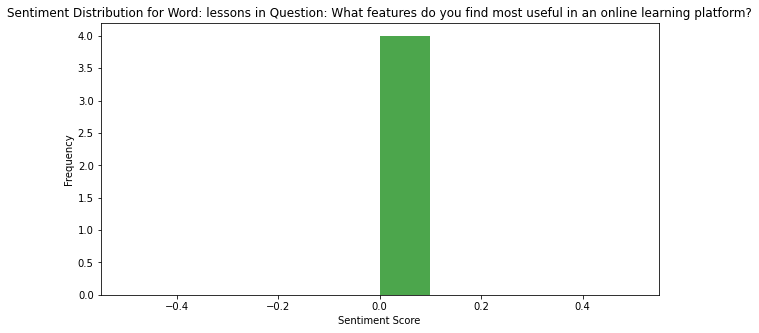

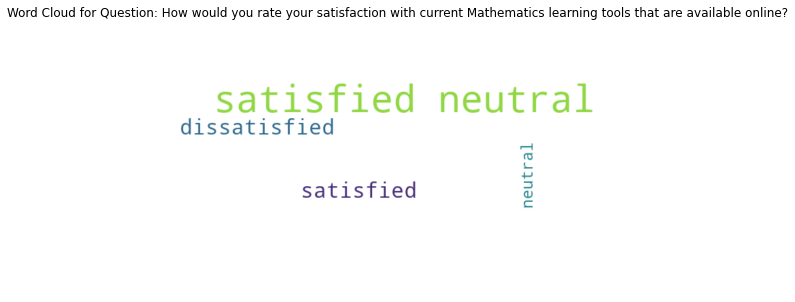

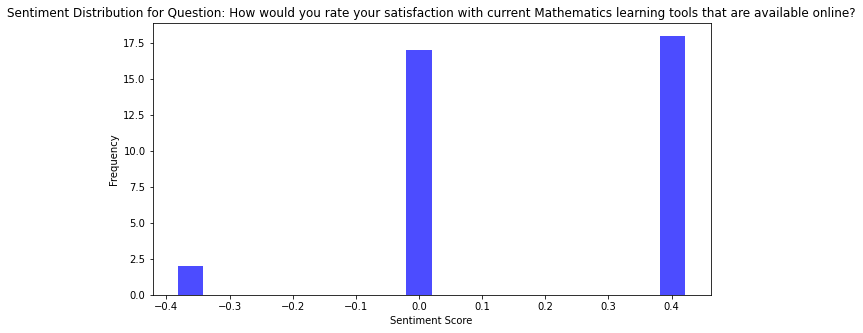

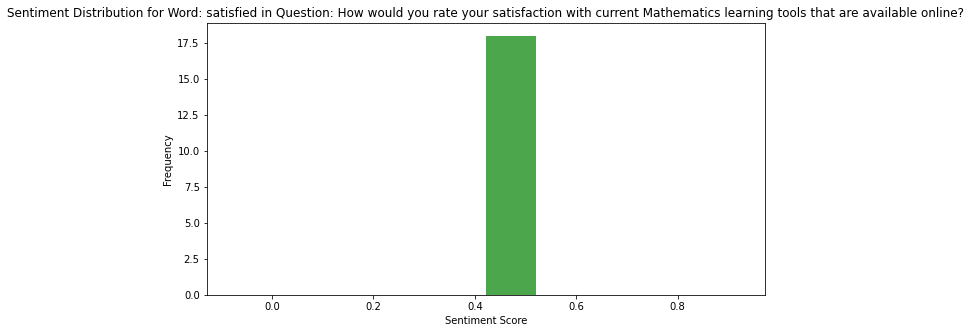

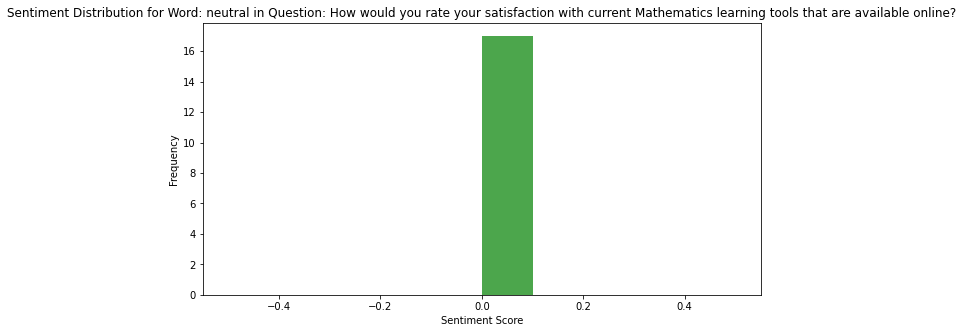

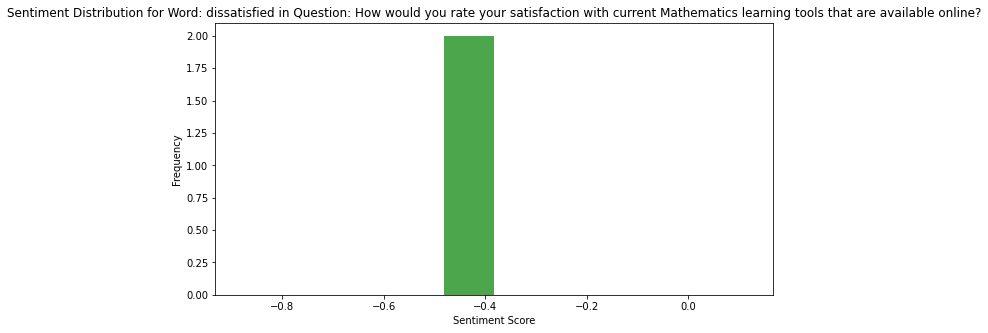

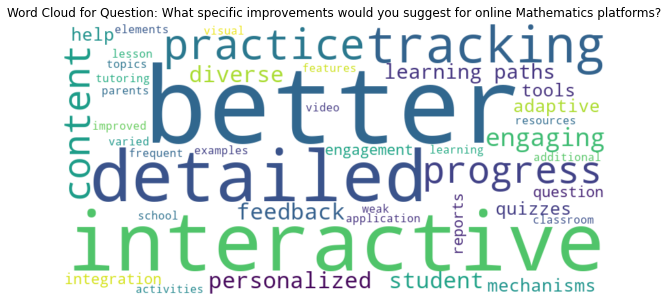

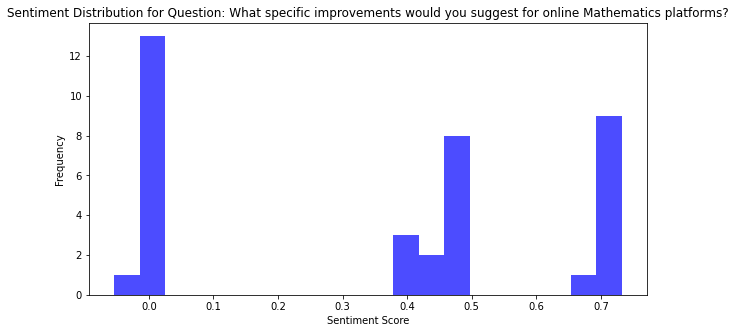

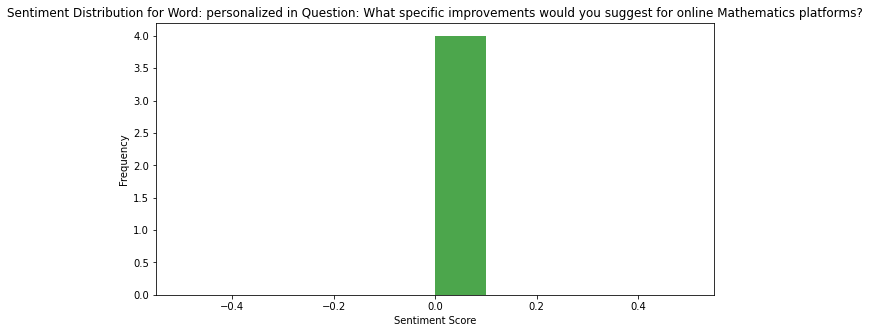

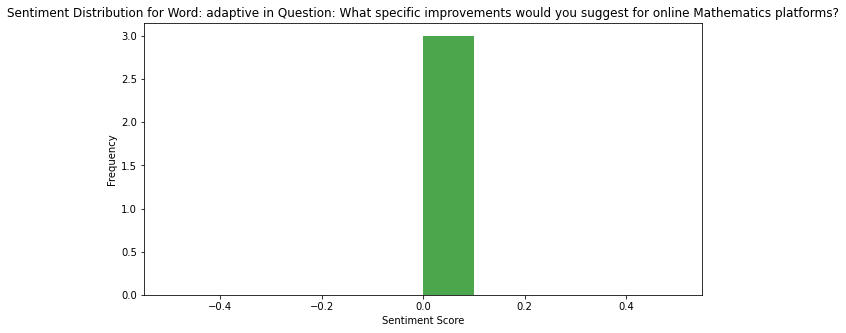

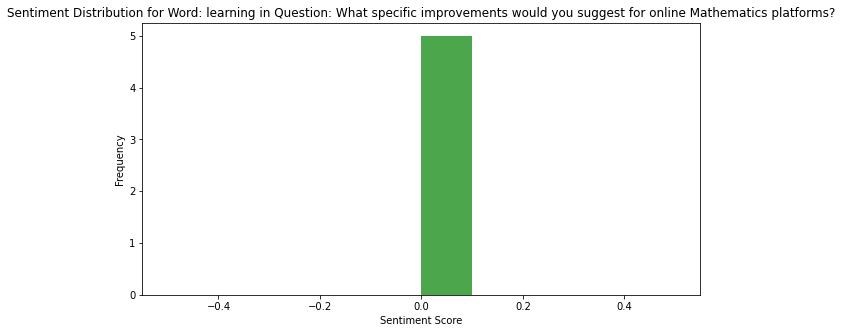

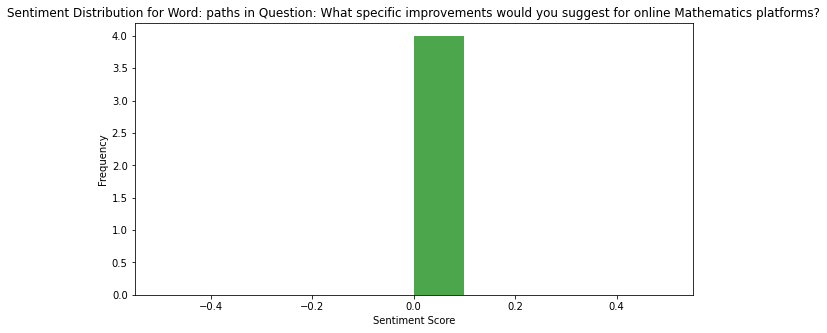

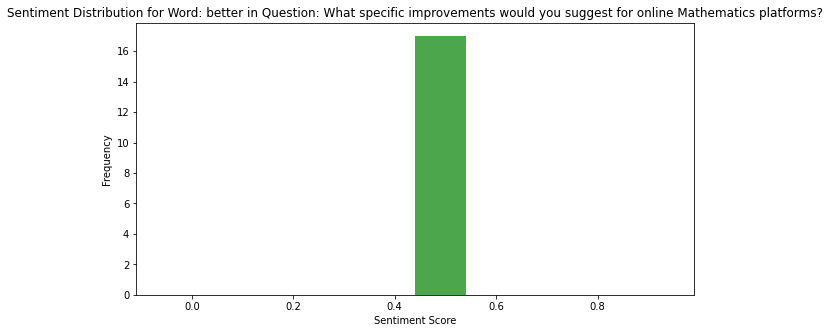

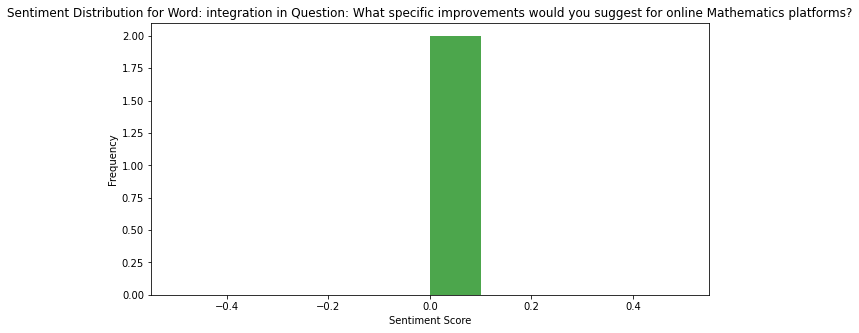

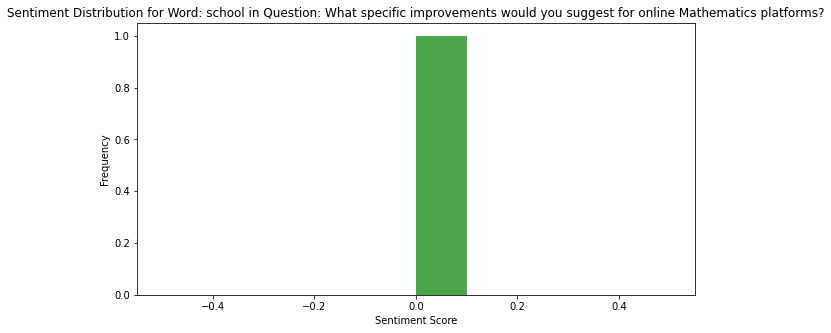

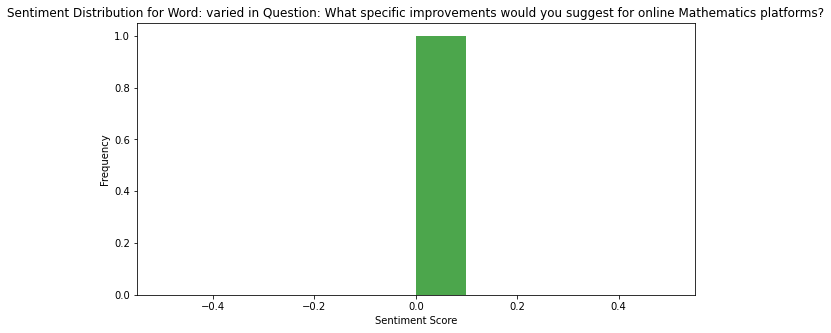

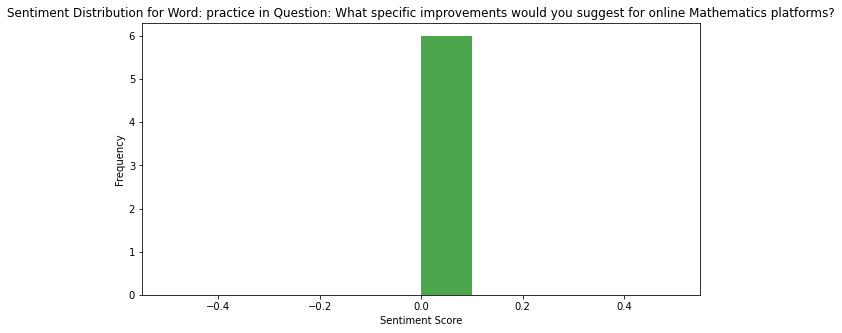

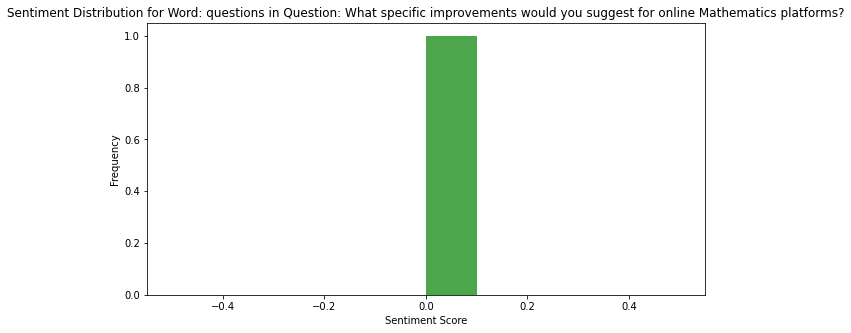

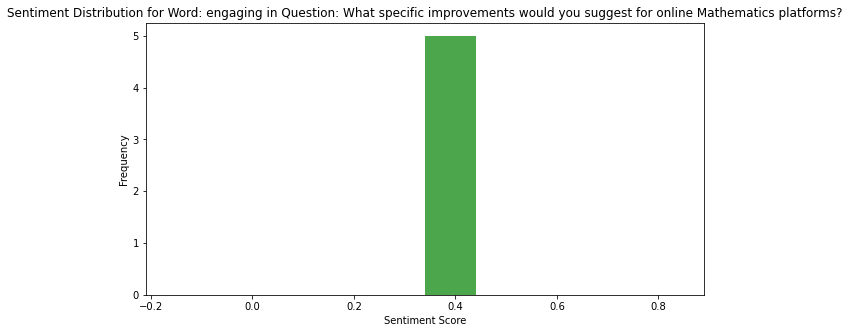

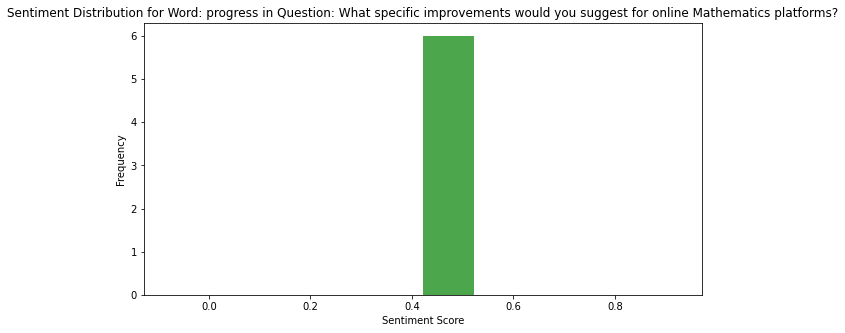

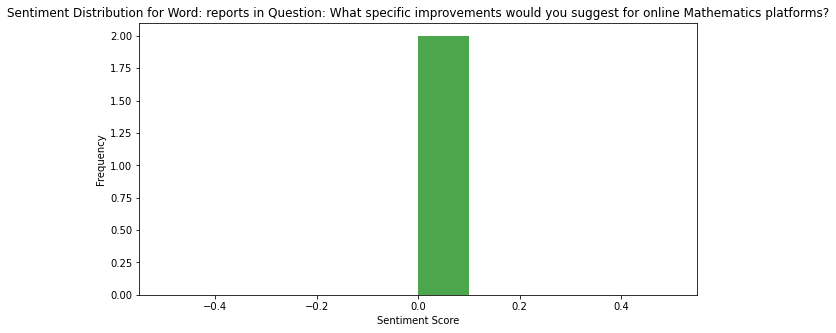

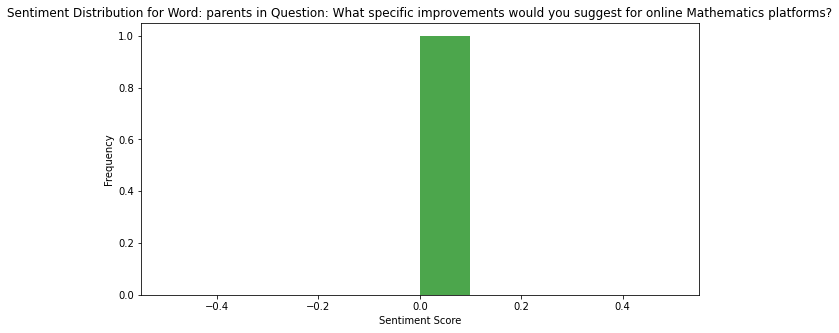

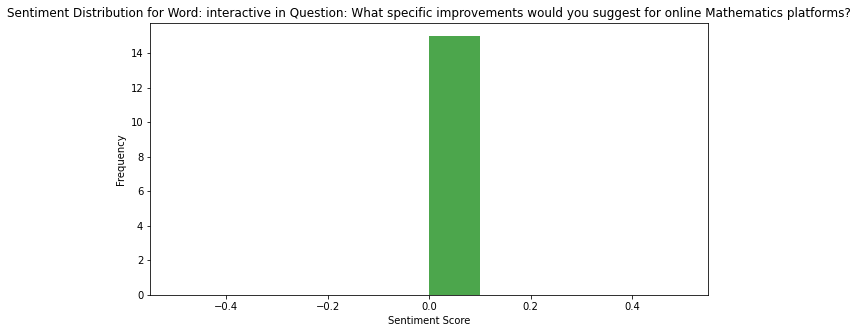

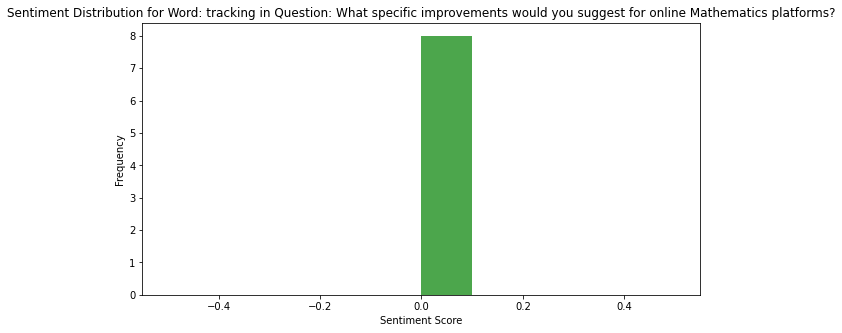

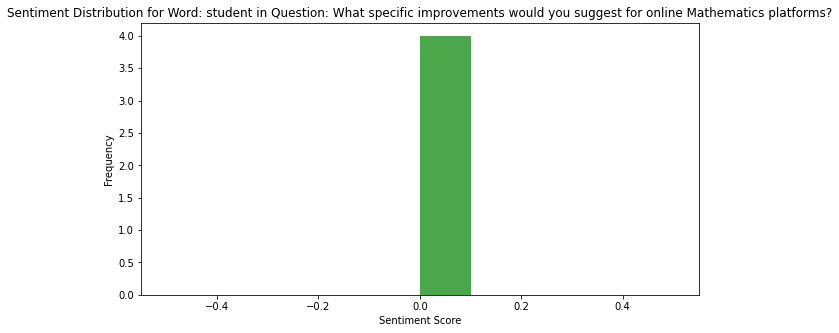

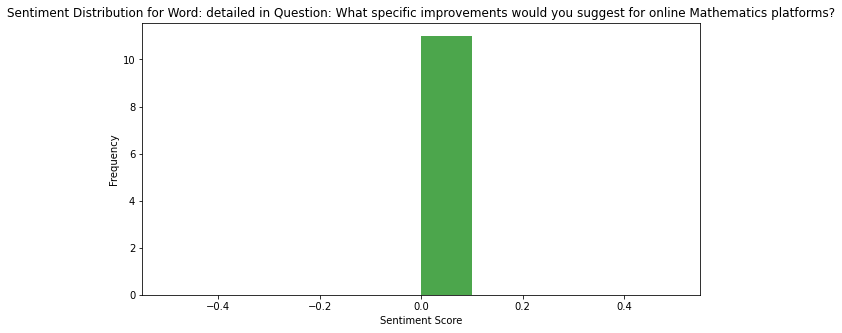

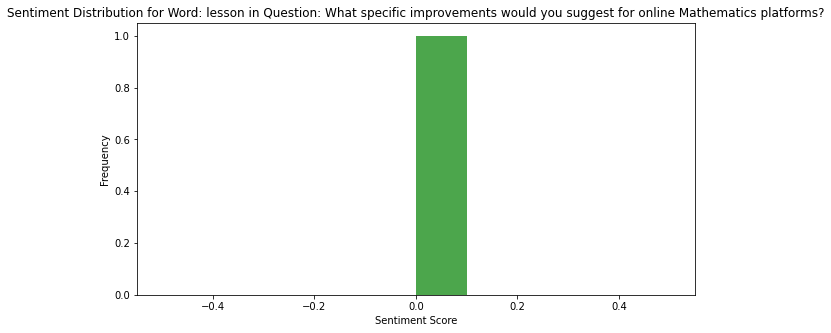

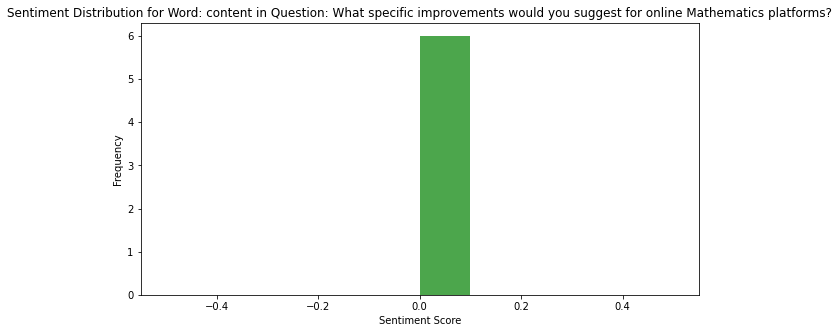

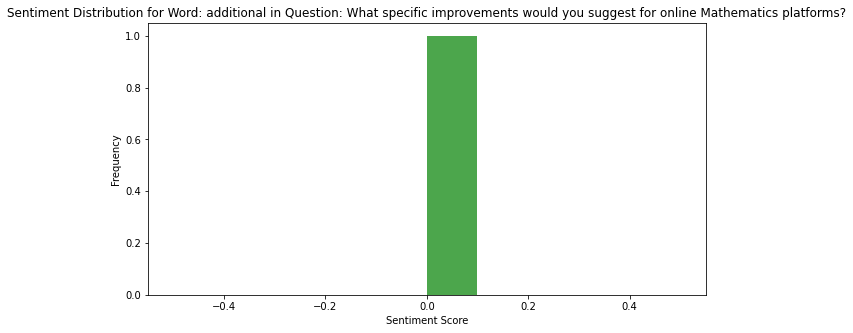

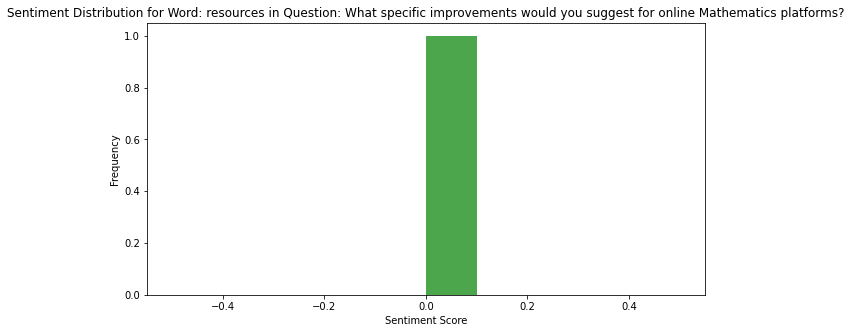

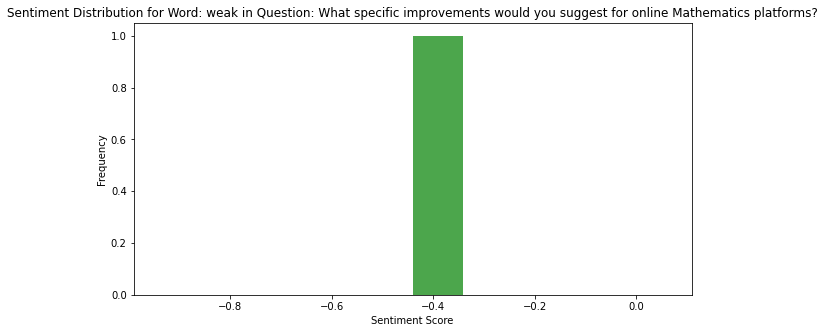

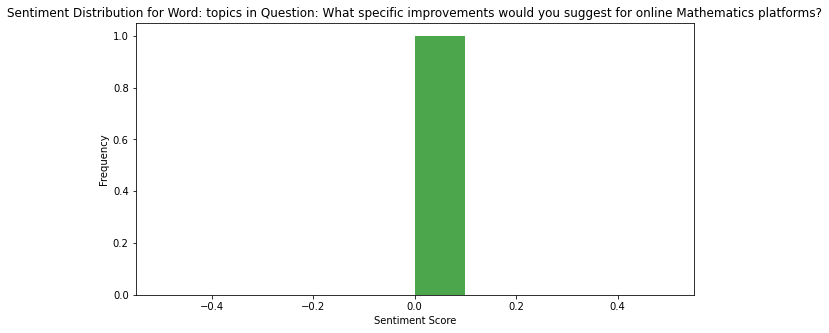

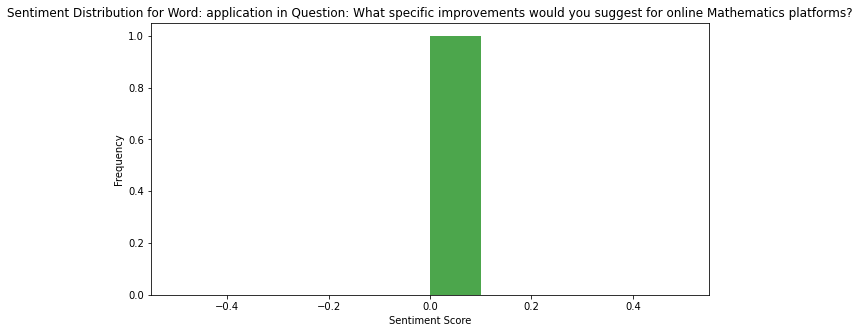

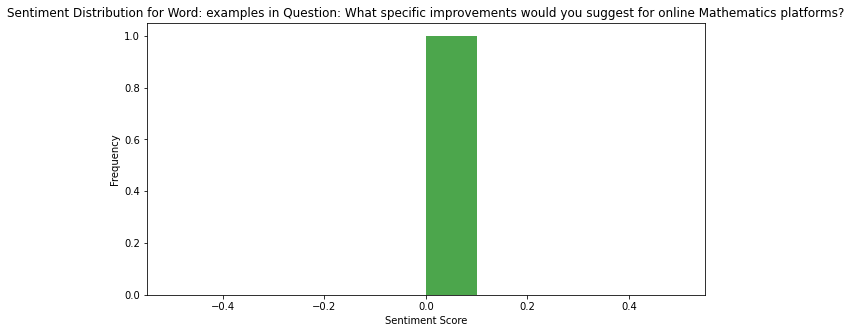

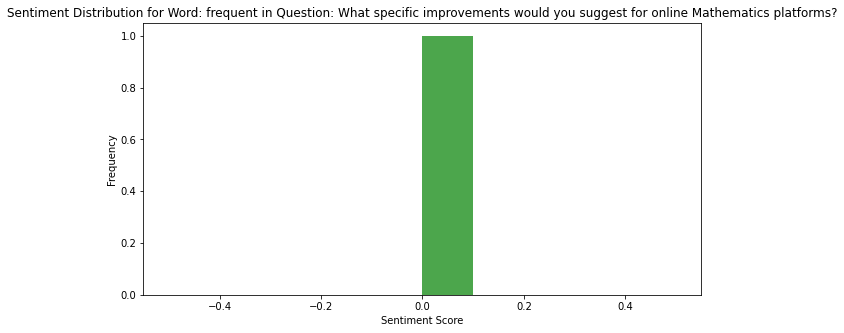

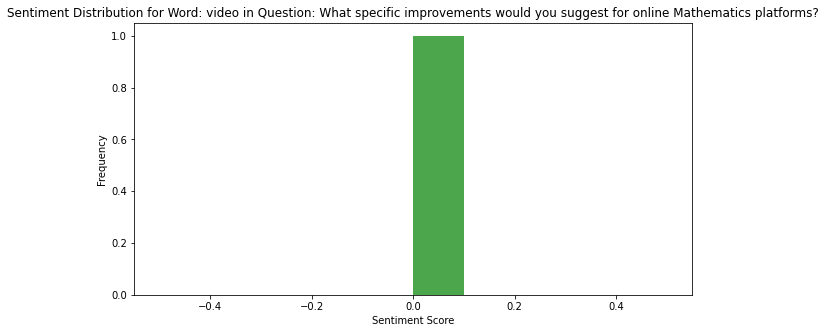

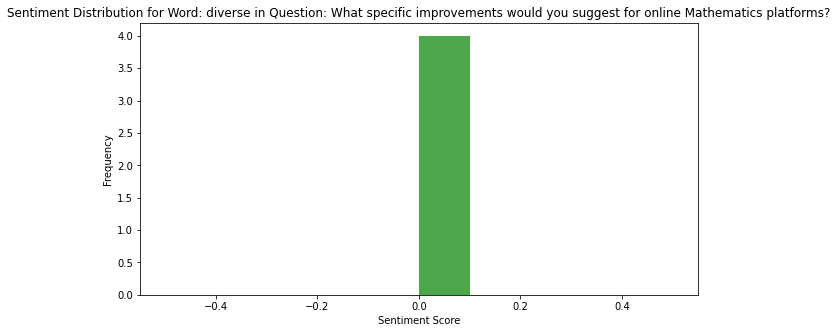

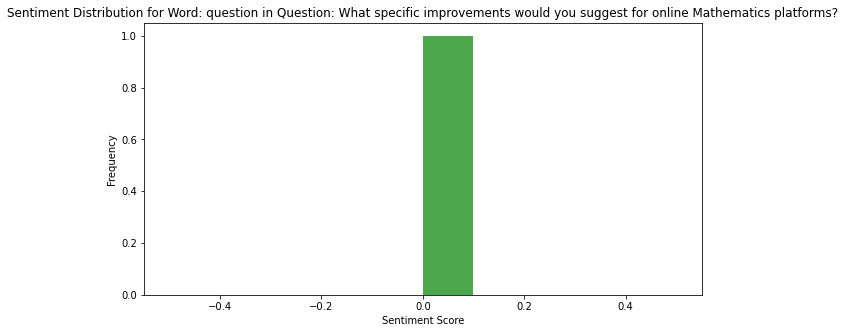

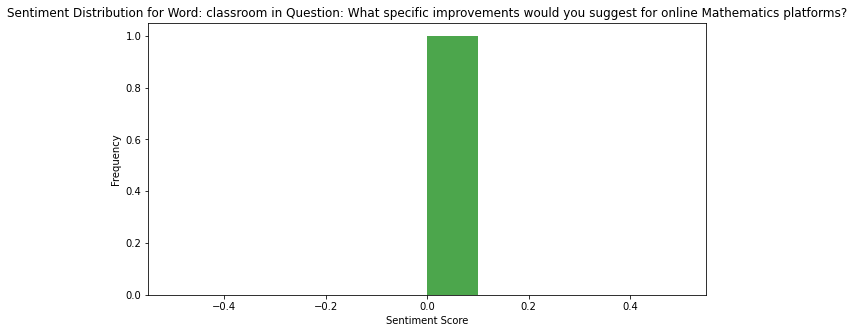

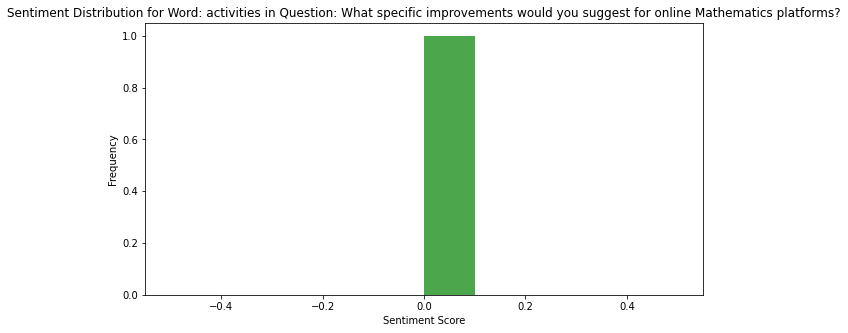

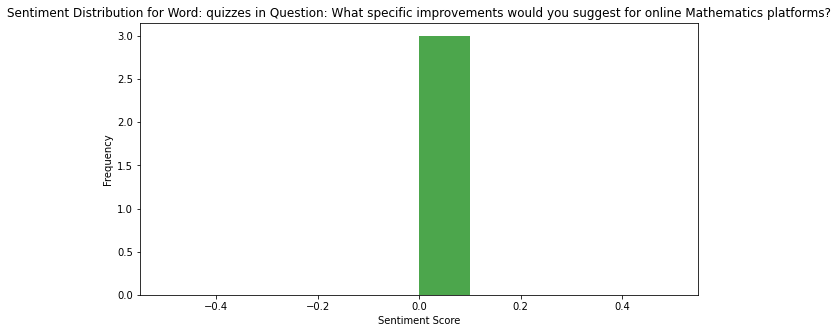

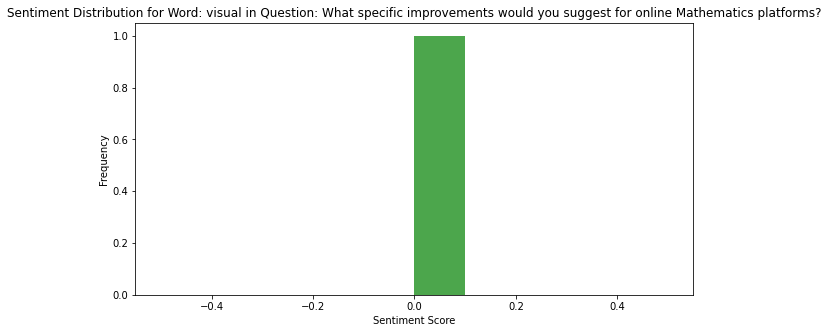

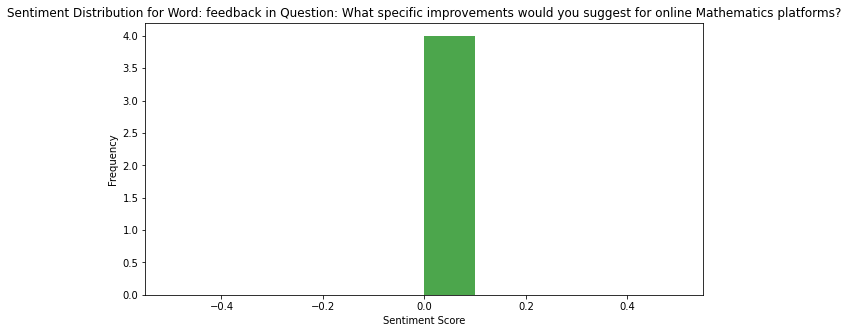

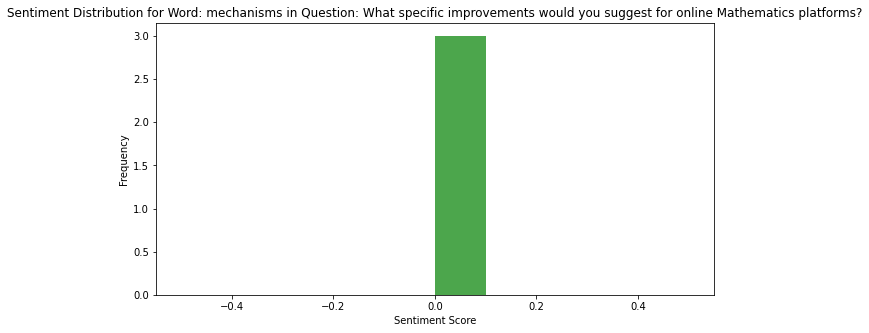

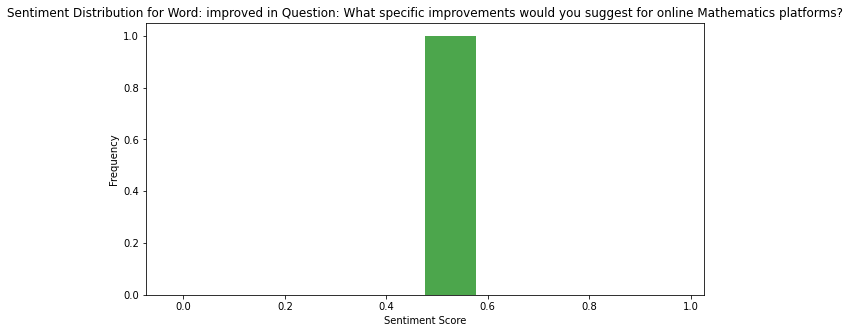

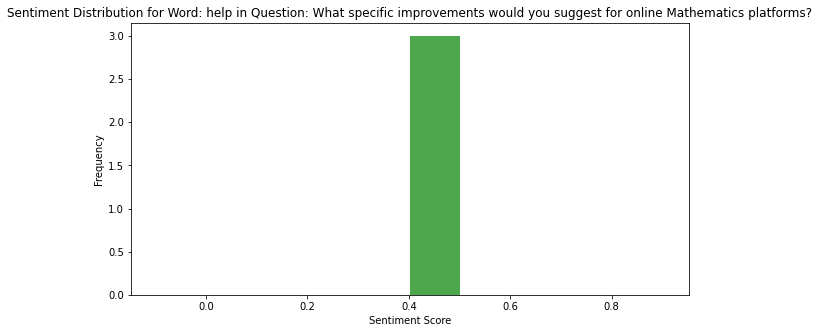

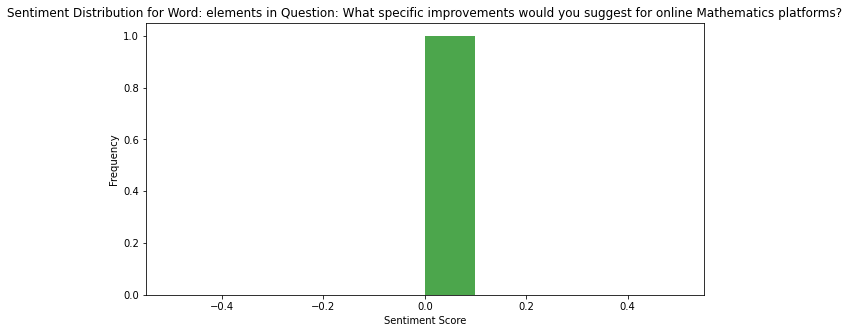

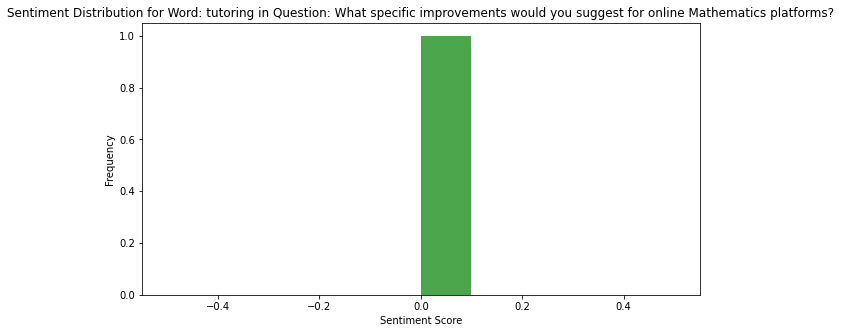

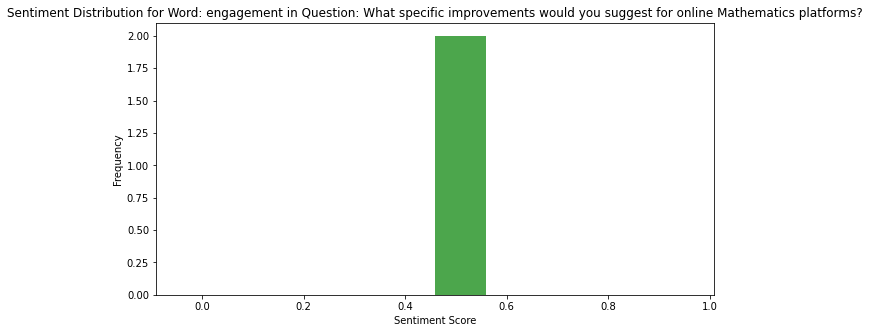

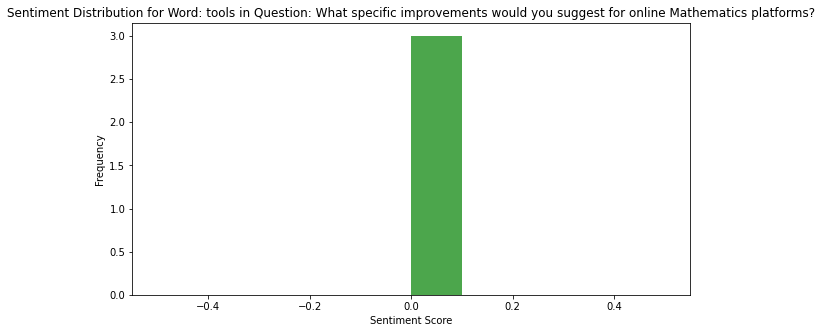

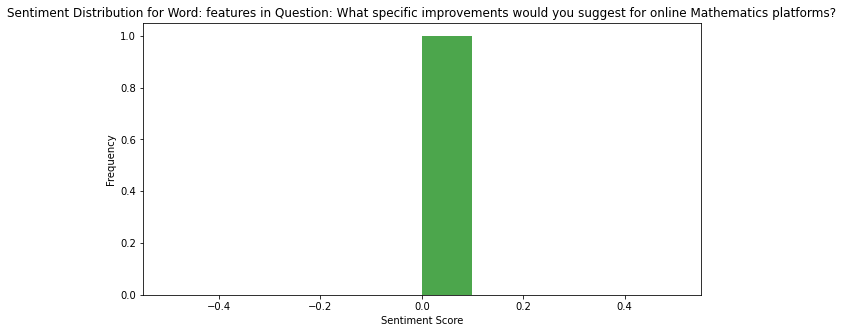

Question: What are the main challenges you face in learning Mathematics?
Average Sentiment: 0.0716162162162162
Common Words: [('understanding', 9), ('child', 9), ('different', 7), ('applying', 6), ('lack', 6), ('engaging', 6), ('pace', 5), ('students', 5), ('online', 5), ('managing', 5)]
---------------------------------------------------
Question: How often do you use online resources for Mathematics learning? 
Average Sentiment: 0.0
Common Words: [('daily', 9), ('weekly', 9), ('occasionally', 9), ('several', 9), ('times', 9), ('week', 9), ('monthly', 1)]
---------------------------------------------------
Question: Give some examples of online resources you use for Mathematics learning.
Average Sentiment: 0.07636
Common Words: [('youtube', 2), ('math', 2), ('khan', 1), ('udemy', 1), ('photo', 1), ('chatgpt', 1), ('generating', 1), ('supplement', 1), ('learning', 1), ('watching', 1)]
---------------------------------------------------
Question: What features do you find most useful in

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the CSV file
file_path = 'Singapore Mathematics Education Survey.csv'
data = pd.read_csv(file_path)

# Define a function to clean and tokenize text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = text.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Initialize an empty list to store the results
results = []

# Loop through each question (column) in the survey
for column in data.columns:
    if column == 'Role':
        continue
    responses = data[column].dropna().tolist()

    # Initialize lists to store sentiments and words
    sentiments = []
    all_words = []
    word_sentiments = {}

    # Loop through each response
    for response in responses:
        # Sentiment analysis
        sentiment = sid.polarity_scores(response)
        sentiments.append(sentiment['compound'])

        # Word frequency and sentiment analysis
        words = preprocess_text(response)
        all_words.extend(words)
        for word in words:
            if word not in word_sentiments:
                word_sentiments[word] = []
            word_sentiments[word].append(sid.polarity_scores(word)['compound'])

    # Calculate average sentiment
    avg_sentiment = sum(sentiments) / len(sentiments)

    # Get common words
    common_words = Counter(all_words).most_common(10)

    # Store the results
    results.append({
        'question': column,
        'avg_sentiment': avg_sentiment,
        'common_words': common_words
    })

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Question: {column}')
    plt.show()

    # Plot sentiment distribution
    plt.figure(figsize=(10, 5))
    plt.hist(sentiments, bins=20, color='blue', alpha=0.7)
    plt.title(f'Sentiment Distribution for Question: {column}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

    # Plot word-level sentiment distribution
    for word, word_sents in word_sentiments.items():
        plt.figure(figsize=(10, 5))
        plt.hist(word_sents, bins=10, color='green', alpha=0.7)
        plt.title(f'Sentiment Distribution for Word: {word} in Question: {column}')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Frequency')
        plt.show()

# Print the results
for result in results:
    print(f"Question: {result['question']}")
    print(f"Average Sentiment: {result['avg_sentiment']}")
    print("Common Words:", result['common_words'])
    print("-" + "-"*50)


# Interview Questions and Responses

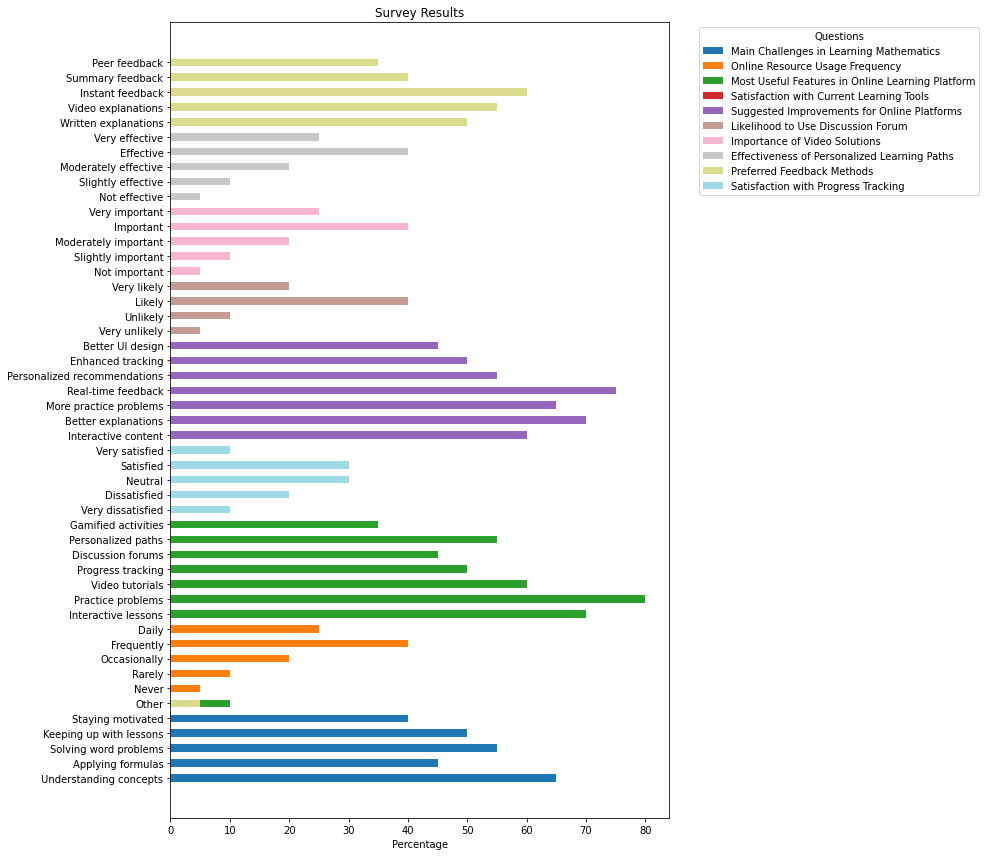

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
questions = [
    "Main Challenges in Learning Mathematics",
    "Online Resource Usage Frequency",
    "Most Useful Features in Online Learning Platform",
    "Satisfaction with Current Learning Tools",
    "Suggested Improvements for Online Platforms",
    "Likelihood to Use Discussion Forum",
    "Importance of Video Solutions",
    "Effectiveness of Personalized Learning Paths",
    "Preferred Feedback Methods",
    "Satisfaction with Progress Tracking"
]

options = [
    ["Understanding concepts", "Applying formulas", "Solving word problems", "Keeping up with lessons", "Staying motivated", "Other"],
    ["Never", "Rarely", "Occasionally", "Frequently", "Daily"],
    ["Interactive lessons", "Practice problems", "Video tutorials", "Progress tracking", "Discussion forums", "Personalized paths", "Gamified activities", "Other"],
    ["Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"],
    ["Interactive content", "Better explanations", "More practice problems", "Real-time feedback", "Personalized recommendations", "Enhanced tracking", "Better UI design", "Other"],
    ["Very unlikely", "Unlikely", "Neutral", "Likely", "Very likely"],
    ["Not important", "Slightly important", "Moderately important", "Important", "Very important"],
    ["Not effective", "Slightly effective", "Moderately effective", "Effective", "Very effective"],
    ["Written explanations", "Video explanations", "Instant feedback", "Summary feedback", "Peer feedback", "Other"],
    ["Very dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very satisfied"]
]

percentages = [
    [65, 45, 55, 50, 40, 5],
    [5, 10, 20, 40, 25],
    [70, 80, 60, 50, 45, 55, 35, 10],
    [10, 20, 30, 30, 10],
    [60, 70, 65, 75, 55, 50, 45, 5],
    [5, 10, 25, 40, 20],
    [5, 10, 20, 40, 25],
    [5, 10, 20, 40, 25],
    [50, 55, 60, 40, 35, 5],
    [10, 20, 30, 30, 10]
]

# Create DataFrame
df_list = []

for question, opts, perc in zip(questions, options, percentages):
    for opt, p in zip(opts, perc):
        df_list.append({"Question": question, "Option": opt, "Percentage": p})

df = pd.DataFrame(df_list)

# Plotting
fig, ax = plt.subplots(figsize=(14, 12))
bar_width = 0.5

# Unique colors for each question
colors = plt.cm.get_cmap('tab20', len(questions))

# Plot each question's options with a different color
for i, question in enumerate(df["Question"].unique()):
    subset = df[df["Question"] == question]
    ax.barh(subset["Option"], subset["Percentage"], bar_width, label=question, color=colors(i))

# Labeling
ax.set_xlabel('Percentage')
ax.set_title('Survey Results')
ax.legend(title='Questions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# List of CSV files
csv_files = [
    'future_enhancement_plan.csv',
    'error_tracking_sheets.csv',
    'survey_responses.csv',
    'task_completion_logs.csv',
    'summary_of_feedback.csv'
]

# Function to print the head of each CSV file
def print_csv_heads(files):
    for file in files:
        df = pd.read_csv(file)
        print(f"Head of {file}:")
        print(df.head(), "\n")

# Print heads of CSV files
print_csv_heads(csv_files)

# Read and print the head of the Excel file
excel_file = 'Singapore Mathematics Education Survey.xlsx'
excel_df = pd.read_excel(excel_file)
print(f"Head of {excel_file}:")
print(excel_df.head())


Head of future_enhancement_plan.csv:
               Feature                                Planned Improvement
0         AI Responses  Provide more detailed and context-specific ass...
1  Collaborative Tools              Integrate real-time peer interactions 

Head of error_tracking_sheets.csv:
  Participant    Task  Errors
0   Student 1  Task A       3
1   Student 1  Task B       1
2   Student 1  Task C       2
3   Student 1  Task D       2
4   Student 2  Task A       0 

Head of survey_responses.csv:
  Participant  Satisfaction (1-5)  Ease of Use (1-5)  Usefulness (1-5)  \
0   Student 1                   3                  3                 4   
1   Student 2                   4                  3                 3   
2   Student 3                   4                  3                 4   
3   Student 4                   5                  3                 4   
4   Student 5                   5                  4                 5   

        Open-Ended Feedback  
0              Ve